In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/inv_pharma_wIPC.csv')

In [4]:
app = pd.read_csv('data/app_reg_pharma.csv')

In [168]:
df.head()

,Unnamed: 0,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,A61K038/21
1,1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,C07K014/555
2,2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977.0,1978.0,C12P021/00
3,3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977.0,1978.0,A61K038/00
4,4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977.0,1978.0,A61P001/12


In [5]:
app.head()

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share
0,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5
1,EP20000107845,2.0,MEDIMMUNE LIMITED,"Milstein Building Granta Park Cambridge,Cambri...",UKH12,GB,1.0,0.5
2,EP20080159140,589.0,Boehringer Ingelheim Pharma GmbH & Co. KG,"Binger Strasse 173,55216 Ingelheim am Rhein",DEB3J,DE,1.0,1.0
3,EP20080159141,590.0,Boehringer Ingelheim Pharma GmbH & Co. KG,"Binger Strasse 173,55216 Ingelheim am Rhein",DEB3J,DE,1.0,1.0
4,EP20010940394,1254.0,Unilever PLC,"Unilever House 100 Victoria Embankment London,...",UKI11,GB,1.0,0.5


In [6]:
app=app[app['ctry_code'] == 'GB']

In [36]:
mapping_dict = {
    'UKK21': ['UKK24'],
    'UKK22': ['UKK25'],
    'UKM21': ['UKM71'],
    'UKM22': ['UKM72'],
    'UKM23': ['UKM73'],
    'UKM25': ['UKM75'],
    'UKM26': ['UKM76'],
    'UKM27': ['UKM77'],
    'UKM28': ['UKM78'],
    'UKM31': ['UKM81'],
    'UKM34': ['UKM82'],
    'UKM35': ['UKM83'],
    'UKM36': ['UKM84'],
    'UKM24': ['UKM91'],
    'UKM33': ['UKM93'],
    'UKM37': ['UKM94'],
    'UKM38': ['UKM95'],
    'UKN01': ['UKN06'],
    'UKD31': ['UKD33', 'UKD34', 'UKD35'],
    'UKD32': ['UKD36', 'UKD37'],
    'UKD43': ['UKD44', 'UKD45', 'UKD46', 'UKD47'],
    'UKH13': ['UKH15', 'UKH16', 'UKH17'],
    'UKH33': ['UKH34', 'UKH35', 'UKH36', 'UKH37'],
    'UKI11': ['UKI31', 'UKI32', 'UKI33', 'UKI34'],
    'UKI12': ['UKI41', 'UKI42', 'UKI43', 'UKI44', 'UKI45'],
    'UKI21': ['UKI51', 'UKI52', 'UKI53', 'UKI54'],
    'UKI22': ['UKI61', 'UKI62', 'UKI63'],
    'UKI23': ['UKI71', 'UKI72', 'UKI73', 'UKI74', 'UKI75'],
    'UKJ23': ['UKJ25', 'UKJ26'],
    'UKJ24': ['UKJ27', 'UKJ28'],
    'UKJ33': ['UKJ35', 'UKJ36', 'UKJ37'],
    'UKJ42': ['UKJ43', 'UKJ44', 'UKJ45', 'UKJ46']
}

### Descriptive Analysis 

Remove duplicates due to multiple IPC and author.
IPC_Pharma only to 2016

In [178]:
df_da = df[['app_nbr','reg_code','prio_year']]
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977.0
1,EP19780100395,UKJ42,1977.0
2,EP19780100395,UKJ42,1977.0
3,EP19780100463,UKJ42,1977.0
4,EP19780100463,UKJ42,1977.0


In [179]:
df_da = df_da.drop_duplicates()
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977.0
3,EP19780100463,UKJ42,1977.0
11,EP19780100669,UKI22,1977.0
14,EP19780100690,UKH23,1977.0
23,EP19780100717,UKI23,1977.0


In [180]:
print("Before dropping, "+ str(len(df)) +" rows.")
print("After dropping, "+ str(len(df_da)) +" rows.")

Before dropping, 208113 rows.
After dropping, 31484 rows.


In [181]:
df_da['prio_year'] = df_da['prio_year'].astype(int).astype(str)
df_da = df_da[df_da['prio_year'] != '2017']

In [182]:
# Convert 'prio_year' to integer
df_da['prio_year'] = df_da['prio_year'].astype(int)

# Get the range of years
years = df_da['prio_year'].unique()

# Initialize an empty DataFrame to store the results
results = {}

# Loop over each year
for year in years:
    # Filter the data for the current year
    df_year = df_da[df_da['prio_year'] == year]
    
    # Calculate the total number of patents for each region
    total_patents_per_region = df_year.groupby('reg_code')['app_nbr'].nunique()
    
    # Calculate the total number of patents for the year
    total_patents = df_year['app_nbr'].nunique()
    
    # Get descriptive statistics
    desc_stats = total_patents_per_region.describe()
    
    # Add the total number of patents to the descriptive statistics
    desc_stats = desc_stats.append(pd.Series(total_patents, index=['total_pharma_patents']))
    
    # Append the results to the results dictionary
    results[year] = desc_stats

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                           1977        1978        1979        1980  \
count                 22.000000   35.000000   36.000000   42.000000   
mean                   3.727273    5.800000    6.000000    5.428571   
std                    4.014045    8.463764    8.802597    7.893013   
min                    1.000000    1.000000    1.000000    1.000000   
25%                    1.000000    1.000000    1.000000    1.000000   
50%                    1.500000    2.000000    2.000000    2.000000   
75%                    5.000000    4.500000    6.250000    5.750000   
max                   17.000000   36.000000   38.000000   36.000000   
total_pharma_patents  82.000000  203.000000  216.000000  228.000000   

                            1981        1982        1983        1984  \
count                  46.000000   50.000000   56.000000   61.000000   
mean                    6.478261    5.900000    6.357143    5.901639   
std                     9.052290    9.107633    8.969501    8.603691   
m

In [451]:
# # Plot the count and standard deviation statistics
# plt.figure(figsize=(10, 6))
# plt.plot(results_df.loc['mean'], marker='o', label='Mean')
# plt.plot(results_df.loc['std'], marker='o', label='Standard Deviation')
# plt.xlabel('Year')
# plt.ylabel('Value')
# plt.title('Mean and Standard Deviation of Patents per Year')
# plt.legend()
# plt.grid(True)
# plt.savefig('mean&std.png', dpi=300, bbox_inches='tight')
# plt.show()

In [176]:
import seaborn as sns
import numpy as np

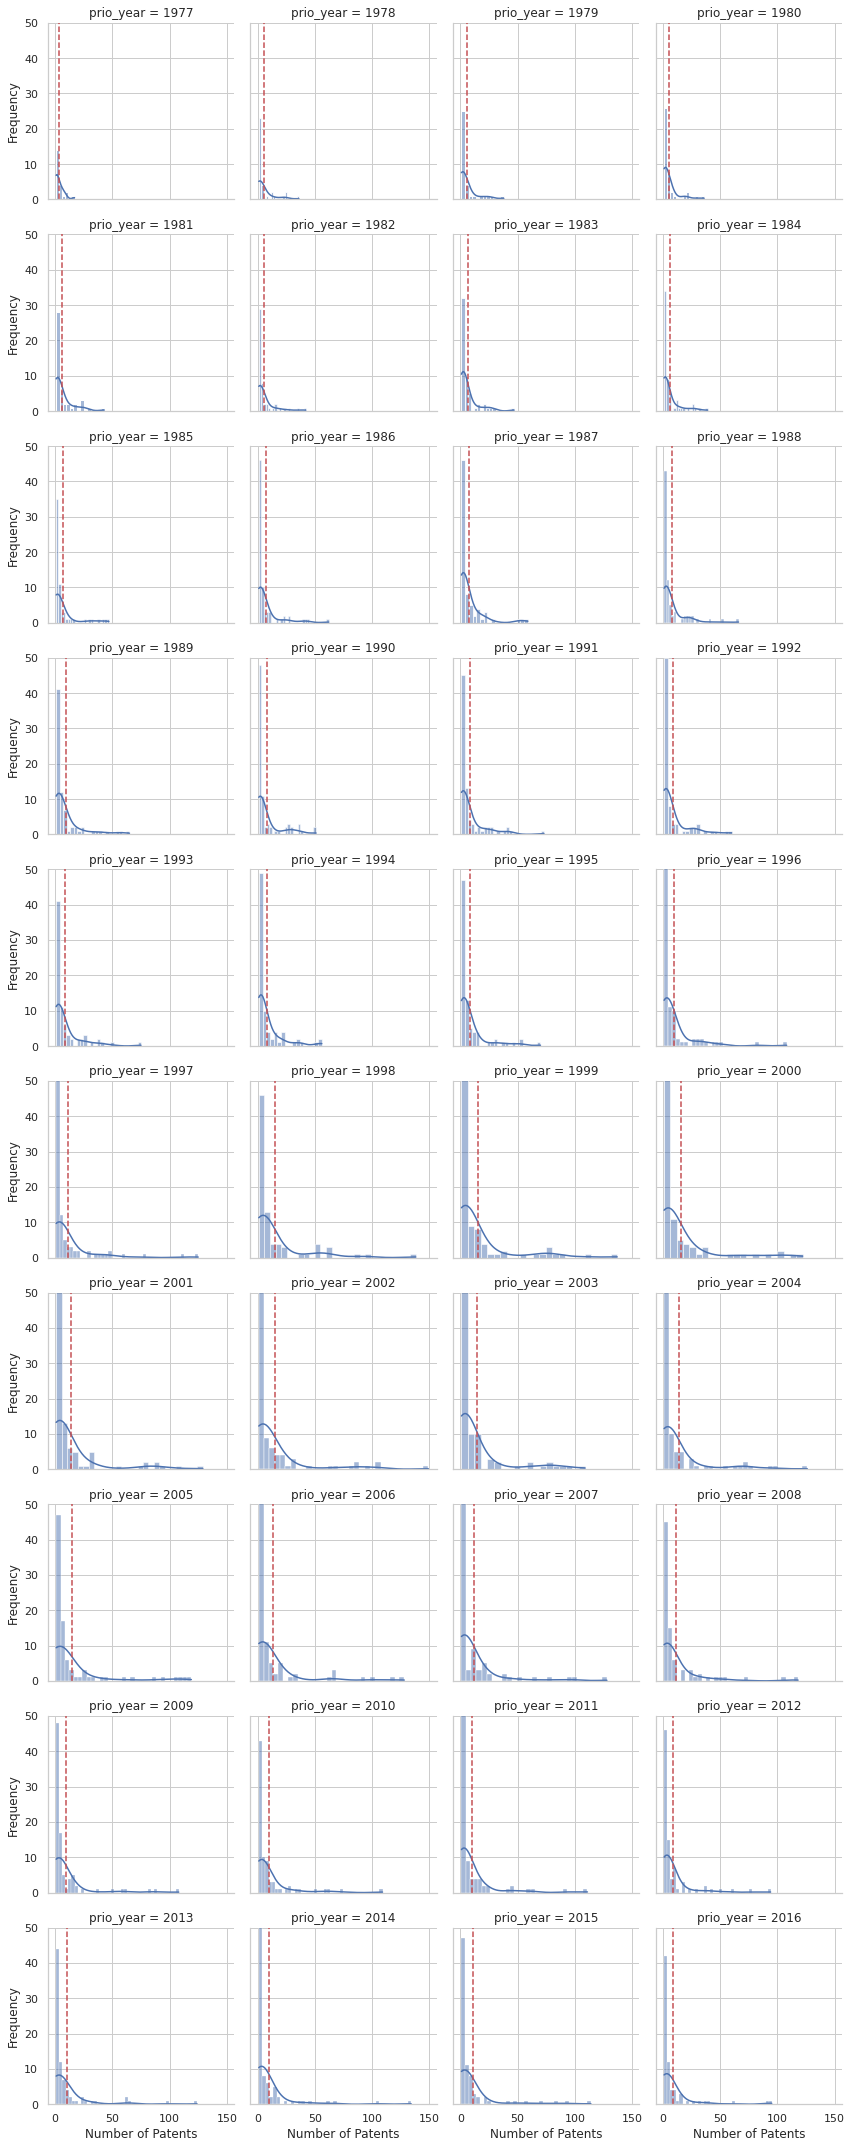

In [452]:
#x-axis: number of patents for each region
#y-axis: frequency of number of patents
def set_xticks(x, **kwargs):
    xticks = plt.xticks()[0]

    n = 10  
    xticks = xticks[::n]

    plt.xticks(xticks)
    
df_grouped = df_da.groupby(['prio_year', 'reg_code']).size().reset_index(name='counts')
# Convert 'prio_year' to categorical so that the plots are ordered by year
df_grouped['prio_year'] = pd.Categorical(df_grouped['prio_year'], ordered=True, categories=sorted(df_grouped['prio_year'].unique()))
# Define a function to plot a vertical line at the mean
def plot_mean(data, **kwargs):
    plt.axvline(data.mean(), color='r', linestyle='--')

# Create a FacetGrid object
g = sns.FacetGrid(df_grouped, col="prio_year", col_wrap=4, height=3, aspect=1)

# Map a histogram to each subplot
g = g.map(sns.histplot, "counts", kde=True)

# Add the mean
g = g.map(plot_mean, "counts")

# Set y-axis limits
g.set(ylim=(0, df_grouped['counts'].quantile(0.95)))

# Set labels
g.set_axis_labels('Number of Patents', 'Frequency')
# g = g.map(set_xticks, "counts")

# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)  # Rotate labels to 90 degrees

# # Adjust the layout
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.5)

plt.savefig('distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [453]:
# df_grouped = df_da.groupby(['prio_year', 'reg_code']).size().reset_index(name='counts')

# # Get the top 10 regions with the most patents
# top_regions = df_grouped.groupby('reg_code')['counts'].sum().nlargest(10).index

# # Filter the DataFrame to include only the top regions
# df_grouped = df_grouped[df_grouped['reg_code'].isin(top_regions)]

# # Convert 'prio_year' to categorical so that the plots are ordered by year
# df_grouped['prio_year'] = pd.Categorical(df_grouped['prio_year'], ordered=True, categories=sorted(df_grouped['prio_year'].unique()))

# # Create a FacetGrid object
# g = sns.FacetGrid(df_grouped, col="prio_year", col_wrap=4, height=3, aspect=1)

# # Map a bar plot to each subplot
# g = g.map(sns.barplot, "reg_code", "counts")

# # Show the plot
# plt.show()


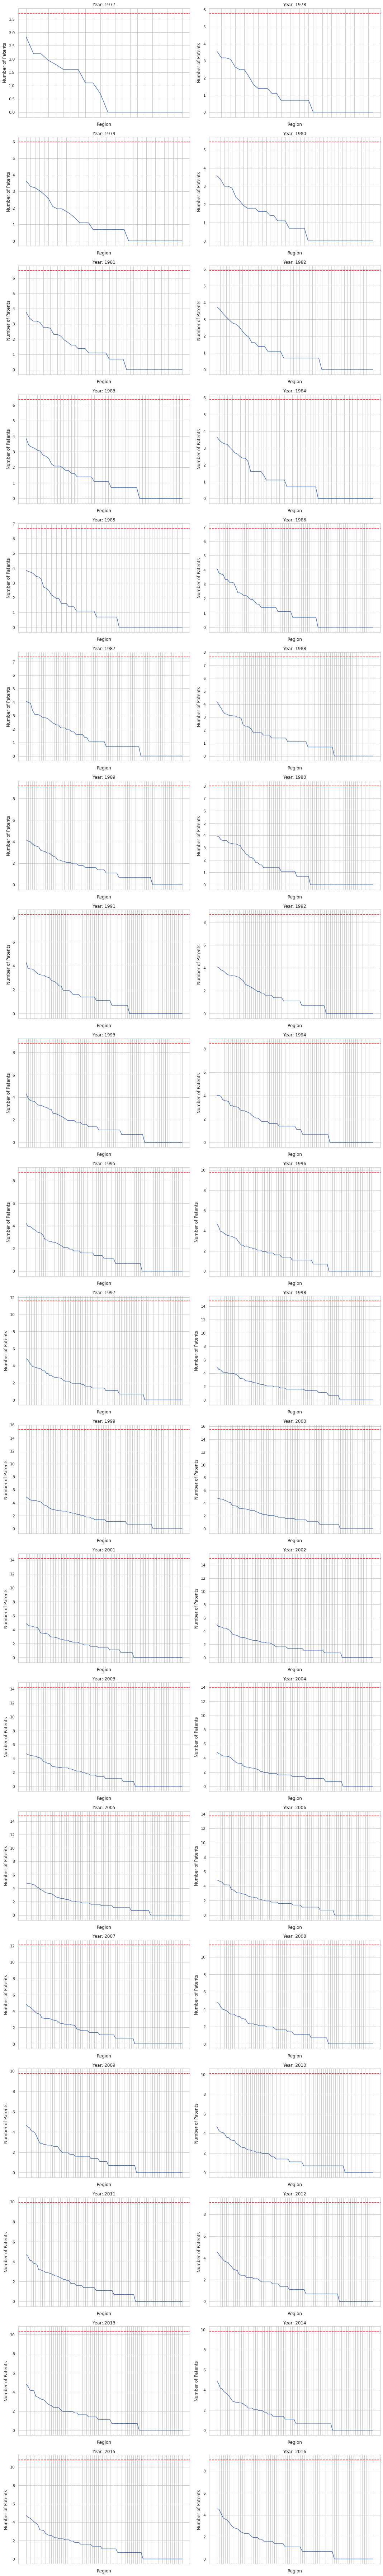

In [454]:
top_regions = df_da['reg_code'].value_counts().index[:5]

# Get the number of unique years
num_years = df_da['prio_year'].nunique()
# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(num_years / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

# Reshape the axes for easy iteration
axs = axs.ravel()

for i, year in enumerate(sorted(df_da['prio_year'].unique())):
    
    df_year = df_da[df_da['prio_year'] == year]
    # Count the number of patents for each region
    df_year_counts = df_year['reg_code'].value_counts().reset_index()
    df_year_counts.columns = ['reg_code', 'counts']
    sns.lineplot(data=df_year_counts, x='reg_code', y=np.log(df_year_counts['counts']), ax=axs[i])
    
    axs[i].set_title(f'Year: {year}')
    
    axs[i].set_xlabel('Region')
    
    axs[i].set_ylabel('Number of Patents')

    # Only label the top 5 regions
    labels = [label if label in top_regions else '' for label in axs[i].get_xticklabels()]
    axs[i].set_xticklabels(labels)

    # Add a horizontal line for the mean
    axs[i].axhline(df_year_counts['counts'].mean(), color='red', linestyle='--')

# If there's an extra subplot, remove it
if num_years % 2 != 0:
    fig.delaxes(axs[-1])
    
plt.tight_layout()

plt.show()


In [172]:
inv = pd.read_csv('data/INV_IPC_SECTION_prior.csv')

inv = inv.drop(['IPC_Section'], axis = 1)
inv = inv.drop_duplicates()

In [176]:
all_patents_yearly = inv.groupby('prio_year')['app_nbr'].count()
all_patents_yearly = all_patents_yearly[0:40]
# all_patents_yearly = all_patents_yearly.reset_index()
# all_patents_yearly

In [183]:
results_df.loc['total_patents'] = all_patents_yearly

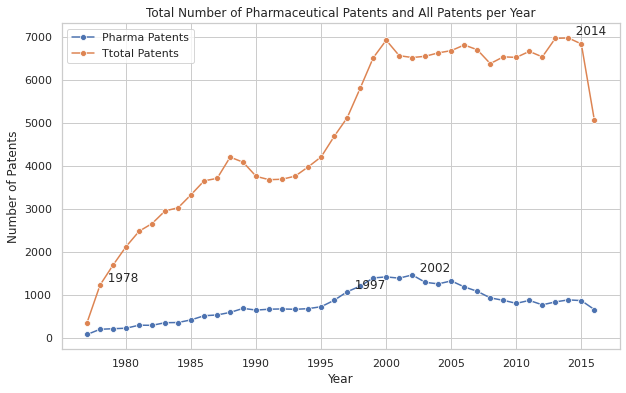

In [186]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_pharma_patents'].diff()
results_df.loc['total_change'] = results_df.loc['total_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_pharma_patents'].idxmax()
max_total_year = results_df.loc['total_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()
max_total_change_year = results_df.loc['total_change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_pharma_patents'], marker='o', ax=ax,label='Pharma Patents')
sns.lineplot(x=results_df.columns, y=results_df.loc['total_patents'], marker='o', ax=ax,label='Ttotal Patents')

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['total_pharma_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')
ax.text(max_total_year, results_df.loc['total_patents', max_total_year], f'  {max_total_year}', verticalalignment='bottom')

ax.legend()
# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['total_pharma_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')
ax.text(max_total_change_year, results_df.loc['total_patents', max_total_change_year], f'  {max_total_change_year}', verticalalignment='bottom')
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Patents')
ax.set_title('Total Number of Pharmaceutical Patents and All Patents per Year')
plt.savefig('Total_Patents.png', dpi=300, bbox_inches='tight')
plt.show()


### Pharma/Total

In [238]:
results_df.loc['share'] = results_df.loc['total_pharma_patents']/results_df.loc['total_patents']
results_df

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,22.000000,35.000000,36.000000,42.000000,46.000000,50.000000,56.000000,61.000000,63.000000,75.000000,...,90.000000,82.000000,90.000000,80.000000,88.000000,85.000000,81.000000,90.000000,81.000000,74.000000
mean,3.727273,5.800000,6.000000,5.428571,6.478261,5.900000,6.357143,5.901639,6.698413,6.906667,...,12.111111,11.402439,9.744444,10.087500,9.943182,9.094118,10.358025,9.855556,10.765432,8.986486
std,4.014045,8.463764,8.802597,7.893013,9.052290,9.107633,8.969501,8.603691,11.276059,11.501085,...,22.713875,20.936034,19.158453,18.275801,18.791266,16.324553,20.784194,20.598113,21.137213,17.526100
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.250000
50%,1.500000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.000000
75%,5.000000,4.500000,6.250000,5.750000,6.750000,4.750000,6.250000,5.000000,5.000000,5.500000,...,11.000000,9.000000,7.000000,8.250000,9.000000,8.000000,7.000000,8.000000,8.000000,7.000000
max,17.000000,36.000000,38.000000,36.000000,43.000000,42.000000,47.000000,39.000000,47.000000,62.000000,...,128.000000,118.000000,108.000000,109.000000,111.000000,94.000000,124.000000,134.000000,114.000000,95.000000
total_pharma_patents,82.000000,203.000000,216.000000,228.000000,298.000000,295.000000,356.000000,360.000000,422.000000,518.000000,...,1086.000000,933.000000,877.000000,806.000000,874.000000,772.000000,839.000000,887.000000,870.000000,662.000000
total_patents,359.000000,1233.000000,1697.000000,2126.000000,2483.000000,2663.000000,2957.000000,3029.000000,3335.000000,3656.000000,...,6705.000000,6382.000000,6540.000000,6527.000000,6667.000000,6539.000000,6970.000000,6979.000000,6840.000000,5071.000000


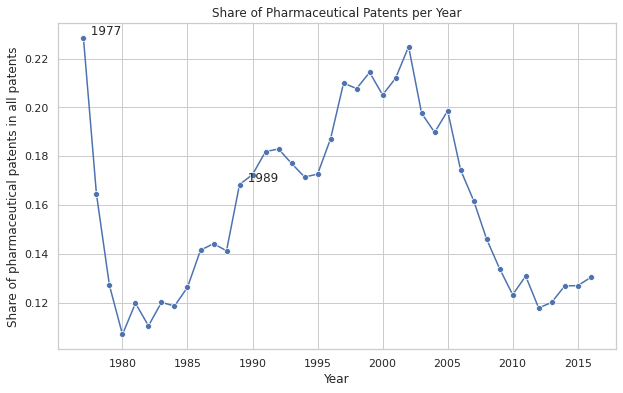

In [241]:
# Calculate the change in share compared to the previous year
results_df.loc['share_change'] = results_df.loc['share'].diff()

# Find the year with the highest share
max_patents_year = results_df.loc['share'].idxmax()

# Find the year with the highest change in share
max_change_year = results_df.loc['share_change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['share'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['share', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['share', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Share of pharmaceutical patents in all patents')
ax.set_title('Share of Pharmaceutical Patents per Year')
plt.savefig('share.png', dpi=300, bbox_inches='tight')
plt.show()



In [302]:
data = [
    ("Imperial Incubator (London)", "W12 0BZ", 2006),
    ("London Bioscience Innovation Centre", "NW1 0NH", 2001),
    ("Mersey Bio Incubator", "NW1 0NH", 2004),
    ("Queen Mary Bio science Innovation Centre", "L69 7ZB", 2008),
    ("Sheffield Bio Incubator", "S3 7RD", 2006),
    ("Bradford Laboratories", "BD7 1DP", 2006),
    ("Babraham Bioscience incubator", "CB22 3AT", 1998),
    ("Cardiff Medicentre", "CF14 4UJ", 1992),
    ("Cardiothoracic bio Incubator (Papworth)", "CB2 0AY", 2006),
    ("C-TRIC (Northern Ireland)", "BT47 6SB", 2009),
    ("ILS (Swansea)", "SA2 8QA", 2012),
    ("Edinburgh bio Quarter", "EH16 4UX", 2013),
    ("BioCity Nottingham", "NG1 1GF", 2003),
    ("BioPark Hertfordshire", "AL10 9AB", 2006),
    ("DiagNox (Oxford)", "OX25 5HD", 2003),
    ("BioCity Scotland", "ML1 5UH", 2011),
    ("Stevenage Bioscience Catalyst", "SG1 2FX", 2011),
    ("BioHub (Alderley Park)", "SK10 4TG", 2014),
    ("Medicity (Boots)", "NG90 6BH", 2013),
    ("Colworth Science Park","MK44 1LQ",2004),
    ("Leeds Bioincubator", "LS2 9NH", 2007),
    ("Manchester (UMIC)","M13 9WU", 1999),
    ("Norwich Bioincubator", "NR4 7UH", 2002),
    ("Roslin", "EH25 9RG", 1999),
    ("Tetricus Bioscience", "SP2 7YW", 2002),
    ("York Biocentre", "YO10 5NY", 2003)
]

incubator = pd.DataFrame(data, columns=["Incubator", "Postcode", "Start Year"])
print(incubator)


                                   Incubator  Postcode  Start Year
0                Imperial Incubator (London)   W12 0BZ        2006
1        London Bioscience Innovation Centre   NW1 0NH        2001
2                       Mersey Bio Incubator   NW1 0NH        2004
3   Queen Mary Bio science Innovation Centre   L69 7ZB        2008
4                    Sheffield Bio Incubator    S3 7RD        2006
5                      Bradford Laboratories   BD7 1DP        2006
6              Babraham Bioscience incubator  CB22 3AT        1998
7                         Cardiff Medicentre  CF14 4UJ        1992
8    Cardiothoracic bio Incubator (Papworth)   CB2 0AY        2006
9                  C-TRIC (Northern Ireland)  BT47 6SB        2009
10                             ILS (Swansea)   SA2 8QA        2012
11                     Edinburgh bio Quarter  EH16 4UX        2013
12                        BioCity Nottingham   NG1 1GF        2003
13                     BioPark Hertfordshire  AL10 9AB        

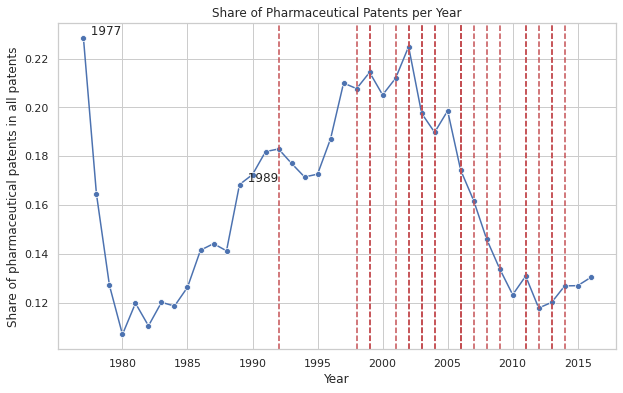

In [303]:
# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['share'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['share', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['share', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Add vertical lines for each year an incubator started
for year in incubator['Start Year']:
    ax.axvline(x=year, color='r', linestyle='--')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Share of pharmaceutical patents in all patents')
ax.set_title('Share of Pharmaceutical Patents per Year')
plt.savefig('share_INCU.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
results_df_T = results_df.transpose()

In [25]:
results_df_T = results_df_T.reset_index()

In [26]:
results_df_T.columns.values[0] = 'prio_year'
results_df_T['prio_year'] = pd.to_numeric(results_df_T['prio_year'])

In [27]:
results_df_T.head()

,prio_year,prio_year,mean,std,min,25%,50%,75%,max,total_pharma_patents,change,total_patents,share,share_change
0,1977,22.0,3.727273,4.014045,1.0,1.0,1.5,5.00,17.0,82.0,NaN,359.0,0.228412,NaN
1,1978,35.0,5.800000,8.463764,1.0,1.0,2.0,4.50,36.0,203.0,121.0,1233.0,0.164639,-0.063773
2,1979,36.0,6.000000,8.802597,1.0,1.0,2.0,6.25,38.0,216.0,13.0,1697.0,0.127283,-0.037356
3,1980,42.0,5.428571,7.893013,1.0,1.0,2.0,5.75,36.0,228.0,12.0,2126.0,0.107244,-0.020040
4,1981,46.0,6.478261,9.052290,1.0,1.0,3.0,6.75,43.0,298.0,70.0,2483.0,0.120016,0.012772


In [28]:
results_df_T.to_csv('data/descriptive.csv', index=False)

### Incubators

In [304]:
from opencage.geocoder import OpenCageGeocode

geocoder = OpenCageGeocode('095f94f051f44c6089a2cb4fb9e56629')

def get_coordinates_none(postcode):
    result = geocoder.geocode(postcode, countrycode='gb')
    if result:
        lat = result[0]['geometry']['lat']
        lng = result[0]['geometry']['lng']
        return pd.Series([lat, lng])
    else:
        return pd.Series([None, None])


In [305]:
incubator[['latitude', 'longitude']] = incubator['Postcode'].apply(get_coordinates_none)
incubator

,Incubator,Postcode,Start Year,latitude,longitude
0,Imperial Incubator (London),W12 0BZ,2006,51.515768,-0.224009
1,London Bioscience Innovation Centre,NW1 0NH,2001,51.536130,-0.133409
2,Mersey Bio Incubator,NW1 0NH,2004,51.536130,-0.133409
3,Queen Mary Bio science Innovation Centre,L69 7ZB,2008,53.406942,-2.962870
4,Sheffield Bio Incubator,S3 7RD,2006,53.381736,-1.483173
5,Bradford Laboratories,BD7 1DP,2006,53.791584,-1.763774
6,Babraham Bioscience incubator,CB22 3AT,1998,52.132684,0.205443
7,Cardiff Medicentre,CF14 4UJ,1992,51.506041,-3.185336
8,Cardiothoracic bio Incubator (Papworth),CB2 0AY,2006,52.173522,0.136046
9,C-TRIC (Northern Ireland),BT47 6SB,2009,54.986486,-7.293593


### how the number of patents in each region has changed over two different time periods:
provide insights into the dynamics of patent activity in different regions and help identify regions where patent activity is increasing or decreasing significantly.

In [254]:
window1 = range(1991, 2002)
window2 = range(2002, 2013)

# Compute the total number of patents in each region for each window
patents_window1 = df_da[df_da['prio_year'].isin(window1)].groupby('reg_code')['app_nbr'].count()
patents_window2 = df_da[df_da['prio_year'].isin(window2)].groupby('reg_code')['app_nbr'].count()

# Compute the change in the number of patents for each region
change_in_patents = (patents_window2 - patents_window1)/patents_window1
change_in_patents_new = (patents_window2 - patents_window1)
change_in_patents

reg_code
GBZZZ    0.083969
GY000         NaN
IM000   -0.800000
JE000         NaN
UKC11    0.606061
           ...   
UKN01    0.240000
UKN02    1.875000
UKN03    3.400000
UKN04    0.444444
UKN05    4.000000
Name: app_nbr, Length: 137, dtype: float64

In [216]:
change_in_patents.sort_values(ascending = False)

reg_code
UKG11    12.000000
UKE11     7.571429
UKK30     4.600000
UKN05     4.000000
UKN03     3.400000
           ...    
UKJ31          NaN
UKJ34          NaN
UKK42          NaN
UKM61          NaN
UKM64          NaN
Name: app_nbr, Length: 137, dtype: float64

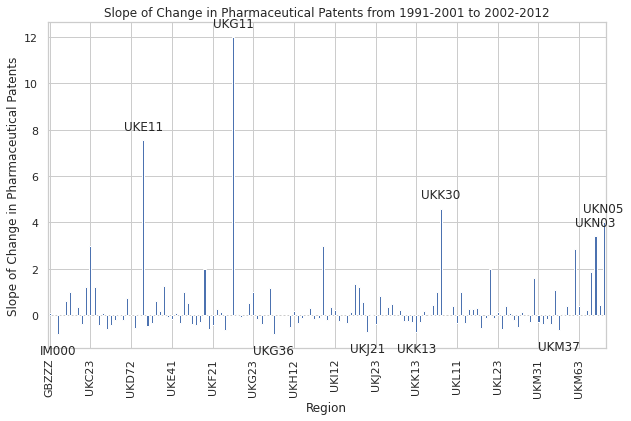

In [393]:
# Plot the change in the number of patents for each region
change_in_patents.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Slope of Change in Pharmaceutical Patents')
plt.title('Slope of Change in Pharmaceutical Patents from 1991-2001 to 2002-2012')

xticks = plt.xticks()[0]
n = 10 
xticks = xticks[::n]
plt.xticks(xticks)
# Label the top 5 and bottom 5 changes
top5_changes = change_in_patents.nlargest(5)
bottom5_changes = change_in_patents.nsmallest(5)
x_positions_top = [change_in_patents.index.get_loc(i) for i in top5_changes.index]
x_positions_bottom = [change_in_patents.index.get_loc(i) for i in bottom5_changes.index]
for i in range(len(top5_changes)):
    plt.annotate(top5_changes.index[i], (x_positions_top[i], top5_changes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(bottom5_changes)):
    plt.annotate(bottom5_changes.index[i], (x_positions_bottom[i], bottom5_changes.iloc[i]), textcoords="offset points", xytext=(0,-20), ha='center')
plt.savefig('window_slope.png', dpi=300, bbox_inches='tight')

plt.show()

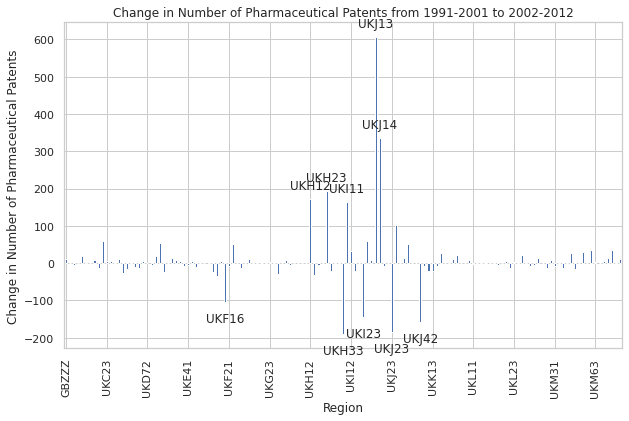

In [394]:
# Plot the change in the number of patents for each region
change_in_patents_new.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Change in Number of Pharmaceutical Patents')
plt.title('Change in Number of Pharmaceutical Patents from 1991-2001 to 2002-2012')

xticks = plt.xticks()[0]
n = 10 
xticks = xticks[::n]
plt.xticks(xticks)
# Label the top 5 and bottom 5 changes
top5_changes = change_in_patents_new.nlargest(5)
bottom5_changes = change_in_patents_new.nsmallest(5)
x_positions_top = [change_in_patents_new.index.get_loc(i) for i in top5_changes.index]
x_positions_bottom = [change_in_patents_new.index.get_loc(i) for i in bottom5_changes.index]
for i in range(len(top5_changes)):
    plt.annotate(top5_changes.index[i], (x_positions_top[i], top5_changes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(bottom5_changes)):
    plt.annotate(bottom5_changes.index[i], (x_positions_bottom[i], bottom5_changes.iloc[i]), textcoords="offset points", xytext=(0,-20), ha='center')

plt.savefig('window_number.png', dpi=300, bbox_inches='tight')
plt.show()

In [195]:
change_in_patents

reg_code
GBZZZ    0.083969
GY000         NaN
IM000   -0.800000
JE000         NaN
UKC11    0.606061
           ...   
UKN01    0.240000
UKN02    1.875000
UKN03    3.400000
UKN04    0.444444
UKN05    4.000000
Name: app_nbr, Length: 137, dtype: float64

In [199]:
import geopandas as gpd

file_path = 'Palma72H/NUTS_RG_20M_2021_3035.shp/NUTS_RG_20M_2021_3035.shp'

gdf = gpd.read_file(file_path)

print(gdf.head())

  NUTS_ID  LEVL_CODE CNTR_CODE     NAME_LATN     NUTS_NAME  MOUNT_TYPE  \
0      FR          0        FR        France        France         0.0   
1      HR          0        HR      Hrvatska      Hrvatska         0.0   
2      HU          0        HU  Magyarország  Magyarország         0.0   
3      AL          0        AL     Shqipëria     Shqipëria         0.0   
4      AT          0        AT    Österreich    Österreich         0.0   

   URBN_TYPE  COAST_TYPE FID  \
0          0           0  FR   
1          0           0  HR   
2          0           0  HU   
3          0           0  AL   
4          0           0  AT   

                                            geometry  
0  MULTIPOLYGON (((9954236.116 -3059379.316, 9961...  
1  MULTIPOLYGON (((4827385.889 2618351.326, 48483...  
2  POLYGON ((5214660.069 2880853.832, 5216710.220...  
3  POLYGON ((5129579.170 2204098.752, 5148385.473...  
4  POLYGON ((4742889.368 2876362.725, 4783217.798...  


In [131]:
uk_gdf = gdf[gdf['CNTR_CODE'].str.contains('UK')]
print(len(uk_gdf))
print(uk_gdf.head())

233
    NUTS_ID  LEVL_CODE CNTR_CODE             NAME_LATN             NUTS_NAME  \
42       UK          0        UK        United Kingdom        United Kingdom   
187     UKJ          1        UK  South East (England)  South East (England)   
188     UKK          1        UK  South West (England)  South West (England)   
189     UKL          1        UK                 Wales                 Wales   
190     UKM          1        UK              Scotland              Scotland   

     MOUNT_TYPE  URBN_TYPE  COAST_TYPE  FID  \
42          0.0          0           0   UK   
187         0.0          0           0  UKJ   
188         0.0          0           0  UKK   
189         0.0          0           0  UKL   
190         0.0          0           0  UKM   

                                              geometry  
42   MULTIPOLYGON (((3643416.574 3198789.397, 36397...  
187  MULTIPOLYGON (((3598326.240 3274989.145, 35918...  
188  MULTIPOLYGON (((3523551.545 3272636.347, 35168...  
189 

In [356]:
incubator['geometry'] = incubator.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
incubator_gdf = gpd.GeoDataFrame(incubator, geometry='geometry', crs="EPSG:4326")
incubator_gdf = incubator_gdf.to_crs(uk_gdf.crs)

In [357]:
# Filter uk_gdf to include only the 'NUTS_ID' column and rows where 'LEVEL_CODE' is 3
uk_gdf_filtered = uk_gdf[uk_gdf['LEVL_CODE'] == 3][['NUTS_ID', 'geometry']]

# Perform the spatial join
incubator_gdf = gpd.sjoin(incubator_gdf, uk_gdf_filtered, how="inner", op='within')

# 'joined_gdf' now contains the data from 'incubator_gdf' with an additional column for the NUTS ID from 'uk_gdf'


In [308]:
# incubator_gdf_new = incubator_gdf.merge(gdf[['NUTS_ID','geometry']], on='NUTS_ID', how='left')

In [351]:
# incubator_gdf_new = gpd.GeoDataFrame(incubator_gdf_new, geometry='geometry_x', crs="EPSG:4326")
# incubator_gdf_new = incubator_gdf_new.to_crs(uk_gdf.crs)

In [395]:
incubator_gdf

,Incubator,Postcode,Start Year,latitude,longitude,geometry,index_right,NUTS_ID
0,Imperial Incubator (London),W12 0BZ,2006,51.515768,-0.224009,POINT (3613963.057 3205755.497),1957,UKI33
1,London Bioscience Innovation Centre,NW1 0NH,2001,51.536130,-0.133409,POINT (3620494.853 3207127.786),1955,UKI31
2,Mersey Bio Incubator,NW1 0NH,2004,51.536130,-0.133409,POINT (3620494.853 3207127.786),1955,UKI31
3,Queen Mary Bio science Innovation Centre,L69 7ZB,2008,53.406942,-2.962870,POINT (3464144.662 3443442.355),1879,UKD72
4,Sheffield Bio Incubator,S3 7RD,2006,53.381736,-1.483173,POINT (3560491.825 3424142.097),1888,UKE32
5,Bradford Laboratories,BD7 1DP,2006,53.791584,-1.763774,POINT (3549565.098 3472214.088),1889,UKE41
6,Babraham Bioscience incubator,CB22 3AT,1998,52.132684,0.205443,POINT (3652653.310 3269794.849),1640,UKH12
8,Cardiothoracic bio Incubator (Papworth),CB2 0AY,2006,52.173522,0.136046,POINT (3648566.937 3274943.199),1640,UKH12
7,Cardiff Medicentre,CF14 4UJ,1992,51.506041,-3.185336,POINT (3411270.306 3237541.897),1708,UKL22
9,C-TRIC (Northern Ireland),BT47 6SB,2009,54.986486,-7.293593,POINT (3225830.782 3674582.464),1834,UKN0A


### Spatial Autocorrelation: Global Moran's I

In [196]:
change_in_patents_df = pd.DataFrame(change_in_patents).reset_index()
change_in_patents_df.head()

,reg_code,app_nbr
0,GBZZZ,0.083969
1,GY000,NaN
2,IM000,-0.800000
3,JE000,NaN
4,UKC11,0.606061


In [197]:
new_change = pd.DataFrame(columns=change_in_patents_df.columns)

for idx, row in change_in_patents_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_change = new_change.append(new_row)
    else:
        new_change = new_change.append(row)
new_change = new_change.reset_index(drop=True)
new_change.columns = ['reg_code','change']
new_change.head()

,reg_code,change
0,GBZZZ,0.083969
1,GY000,NaN
2,IM000,-0.800000
3,JE000,NaN
4,UKC11,0.606061


In [198]:
new_change.to_csv('Change_New.csv', index = False)

In [200]:
change_gdf = new_change.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
change_gdf.head()

,reg_code,change,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.083969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,-0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,0.606061,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [201]:
print(change_gdf['NUTS_ID'].isna().sum())

8


In [202]:
change_gdf = change_gdf.dropna(subset=['geometry'])


In [203]:
print(change_gdf['NUTS_ID'].isna().sum())

0


In [204]:
print(change_gdf['change'].isna().sum())

8


In [205]:
change_gdf = change_gdf.dropna(subset=['change'])

In [206]:
change_gdf = gpd.GeoDataFrame(change_gdf, geometry='geometry')

In [207]:
import pysal.lib as ps

w = ps.weights.Queen.from_dataframe(change_gdf)

In [209]:
from pysal.explore import esda
moran = esda.Moran(change_gdf['change'], w)

('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')


In [210]:
print('Moran\'s I: ', moran.I)

Moran's I:  0.006208212876996972


#### low, but positive, spatial autocorrelation, regions with similar values tend to be located near each other more often than that would be expected if the data were randomly distributed, but the correlation is not very strong

### Location Quotient

In [262]:
inv = inv[['app_nbr','reg_code','prio_year']]
inv = inv.drop_duplicates()
inv.head()

,app_nbr,reg_code,prio_year
0,EP19780100247,UKK30,1977
1,EP19780100395,UKJ42,1977
3,EP19780100400,UKH33,1977
4,EP19780100463,UKJ42,1977
6,EP19780100492,UKJ22,1977


In [263]:
# Compute the number of pharmaceutical patents for each region
pharma_patents_region = df_da.groupby('reg_code')['app_nbr'].count()

# Compute the total number of patents for each region
total_patents_region = inv.groupby('reg_code')['app_nbr'].count()

# Compute the number of pharmaceutical patents for the UK
pharma_patents_UK = df_da['app_nbr'].count()

# Compute the total number of patents for the UK
total_patents_UK = inv['app_nbr'].count()


In [264]:
# Compute the percentage of pharmaceutical patents to all patents in each region
perc_pharma_region = pharma_patents_region / total_patents_region

# Compute the percentage of pharmaceutical patents to all patents in the UK
perc_pharma_UK = pharma_patents_UK / total_patents_UK

# Compute the location quotient for each region
LQ = perc_pharma_region / perc_pharma_UK
LQ

reg_code
GBZZZ    0.878837
GY000    0.254545
IM000    0.171373
JE000    0.103232
UKC11    1.103704
           ...   
UKN01    1.167707
UKN02    0.714683
UKN03    1.183392
UKN04    0.895507
UKN05    0.553029
Name: app_nbr, Length: 143, dtype: float64

In [265]:
# Check for NaN values
nan_rows = LQ[LQ.isna()]
nan_rows

reg_code
UKD41   NaN
UKD42   NaN
UKM32   NaN
UKM65   NaN
UKM66   NaN
Name: app_nbr, dtype: float64

In [266]:
LQ = LQ.dropna()
len(LQ)

138

In [267]:
LQ_df = pd.DataFrame(LQ)
LQ_df = LQ_df.reset_index()
LQ_df.head()

,reg_code,app_nbr
0,GBZZZ,0.878837
1,GY000,0.254545
2,IM000,0.171373
3,JE000,0.103232
4,UKC11,1.103704


In [268]:
print(LQ_df['reg_code'].isna().sum())

0


In [269]:
LQ_gdf = LQ_df.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')

In [38]:
LQ_gdf.head()

,reg_code,app_nbr,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.878837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.254545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.171373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,0.103232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,1.103704,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [248]:
print(LQ_gdf['NUTS_ID'].isna().sum())

40


In [250]:
no_nuts = LQ_gdf[LQ_gdf['NUTS_ID'].isna()]
len(no_nuts)

40

In [253]:
no_nuts['reg_code']

0      GBZZZ
1      GY000
2      IM000
3      JE000
13     UKD31
14     UKD32
15     UKD43
61     UKH13
69     UKH33
70     UKI11
71     UKI12
72     UKI21
73     UKI22
74     UKI23
81     UKJ23
82     UKJ24
85     UKJ33
88     UKJ42
94     UKK21
95     UKK22
113    UKM21
114    UKM22
115    UKM23
116    UKM24
117    UKM25
118    UKM26
119    UKM27
120    UKM28
121    UKM31
122    UKM33
123    UKM34
124    UKM35
125    UKM36
126    UKM37
127    UKM38
133    UKN01
134    UKN02
135    UKN03
136    UKN04
137    UKN05
Name: reg_code, dtype: object

Old: New:
UKK21: UKK24;
UKK22: UKK25;
UKM21: UKM71;
UKM22: UKM72;
UKM23: UKM73;
UKM25: UKM75;
UKM26: UKM76;
UKM27: UKM77;
UKM28: UKM78;
UKM31: UKM81;
UKM34: UKM82;
UKM35: UKM83;
UKM36: UKM84;
UKM24: UKM91;
UKM33: UKM93;
UKM37: UKM94;
UKM38: UKM95;
UKN01: UKN06;
UKD31: UKD33, UKD34, UKD35;
UKD32: UKD36, UKD37;
UKD43: UKD44, UKD45, UKD46, UKD47;
UKH13: UKH15, UKH16, UKH17;
UKH33: UKH34, UKH35, UKH36, UKH37;
UKI11: UKI31, UKI32, UKI33, UKI34;
UKI12: UKI41, UKI42, UKI43, UKI44, UKI45;
UKI21: UKI51, UKI52, UKI53, UKI54;
UKI22: UKI61, UKI62, UKI63;
UKI23: UKI71, UKI72, UKI73, UKI74, UKI75;
UKJ23: UKJ25, UKJ26;
UKJ24: UKJ27, UKJ28;
UKJ33: UKJ35, UKJ36, UKJ37;
UKJ42: UKJ43, UKJ44, UKJ45, UKJ46;
0--3, 134--137；
GBZZZ	EXTRA-REGIO NUTS 3 (United Kingdom)
UKN02 -- UKN05: discontinued

In [257]:
row = gdf[gdf['NUTS_ID'] == 'UKN05']
row

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry


In [270]:
new_df = pd.DataFrame(columns=LQ_df.columns)

for idx, row in LQ_df.iterrows():
    if row['reg_code'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code'] = new_code
            new_df = new_df.append(new_row)
    else:
        new_df = new_df.append(row)
new_df = new_df.reset_index(drop=True)
new_df.head()

,reg_code,app_nbr
0,GBZZZ,0.878837
1,GY000,0.254545
2,IM000,0.171373
3,JE000,0.103232
4,UKC11,1.103704


In [271]:
new_df.columns=['reg_code', 'LQ']

In [272]:
LQ_gdf = new_df.merge(gdf, left_on='reg_code', right_on='NUTS_ID', how='left')
LQ_gdf.head()

,reg_code,LQ,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.878837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.254545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.171373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,JE000,0.103232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,UKC11,1.103704,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."


In [273]:
print(LQ_gdf['NUTS_ID'].isna().sum())

8


In [274]:
len(LQ_gdf)

172

In [510]:
# # Set the CRS of LQ_gdf to match the CRS of uk_gdf
# LQ_gdf = gpd.GeoDataFrame(LQ_gdf, geometry='geometry')
# LQ_gdf = LQ_gdf.to_crs(uk_gdf.crs)

# # Now you can plot your data
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# # Create the base map
# base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# # Add regions to the base map
# LQ_gdf.plot(ax=base, column='app_nbr', cmap='YlOrRd')

# # Move the legend to the right
# leg = ax.get_legend()

# # Label regions
# # Find the top 10 regions
# top10 = LQ_gdf.nlargest(10, 'app_nbr')
# top10_colors = top10['app_nbr']

# cmap = plt.get_cmap('YlOrRd')

# # Get min and max citation counts for normalization
# vmin = LQ_gdf['app_nbr'].min()
# vmax = LQ_gdf['app_nbr'].max()

# # Generate legend elements
# legend_elements = []

# # Add top 10 regions to the legend
# for idx, row in top10.iterrows():
#     color = cmap((row['app_nbr'] - vmin) / (vmax - vmin))
#     patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
#     legend_elements.append(patch)
#     ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

# # Create the legend
# ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 LQ')

# plt.savefig('LQ_map.png', dpi=300, bbox_inches='tight')

# plt.show()



In [276]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches

In [312]:
# Create a new column in uk_gdf that indicates whether each region contains an incubator
# uk_gdf['contains_incubator'] = uk_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
LQ_gdf['contains_incubator'] = LQ_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])

# Set the edge color based on the 'contains_incubator' column
edgecolor = LQ_gdf['contains_incubator'].map({True: 'blue', False: 'white'})

In [355]:
incubator_gdf_new.head()

,Incubator,Postcode,Start Year,latitude,longitude,geometry_x,index_right,NUTS_ID,geometry_y
0,Imperial Incubator (London),W12 0BZ,2006,51.515768,-0.224009,POINT (inf inf),1957,UKI33,"POLYGON ((3614703.482 3207019.234, 3618580.281..."
1,London Bioscience Innovation Centre,NW1 0NH,2001,51.536130,-0.133409,POINT (inf inf),1955,UKI31,"POLYGON ((3623564.114 3204921.729, 3624042.034..."
2,Mersey Bio Incubator,NW1 0NH,2004,51.536130,-0.133409,POINT (inf inf),1955,UKI31,"POLYGON ((3623564.114 3204921.729, 3624042.034..."
3,Queen Mary Bio science Innovation Centre,L69 7ZB,2008,53.406942,-2.962870,POINT (inf inf),1879,UKD72,"POLYGON ((3471545.543 3433575.177, 3464374.935..."
4,Sheffield Bio Incubator,S3 7RD,2006,53.381736,-1.483173,POINT (inf inf),1888,UKE32,"POLYGON ((3569962.605 3416661.128, 3551626.384..."


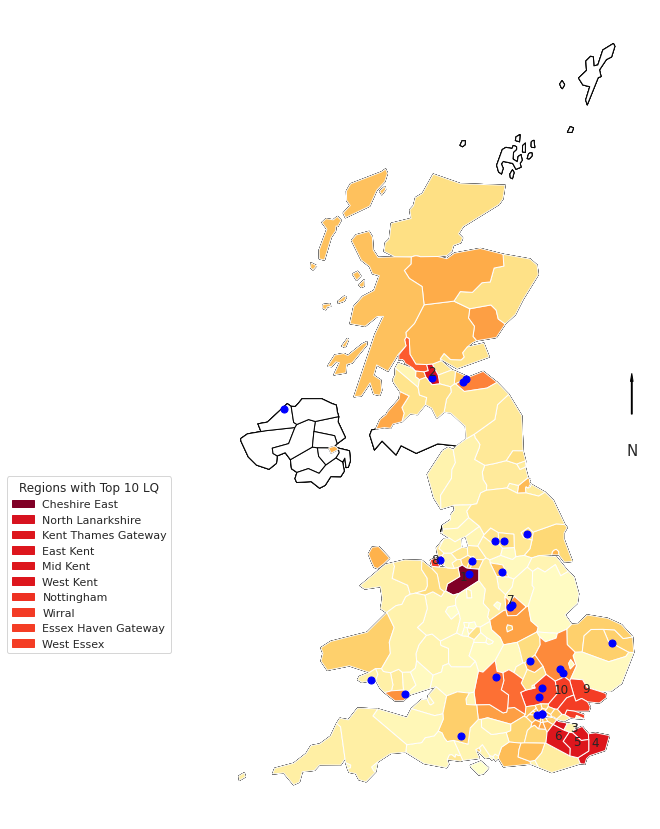

In [397]:
LQ_gdf = gpd.GeoDataFrame(LQ_gdf, geometry='geometry')
LQ_gdf = LQ_gdf.to_crs(uk_gdf.crs)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

base = uk_gdf.plot(ax=ax, color='white', edgecolor = "black")
LQ_gdf.plot(ax=base, column='LQ', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=50)
leg = ax.get_legend()
top10 = LQ_gdf.nlargest(10, 'LQ')
top10_colors = top10['LQ']
cmap = plt.get_cmap('YlOrRd')
vmin = LQ_gdf['LQ'].min()
vmax = LQ_gdf['LQ'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['LQ'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 LQ')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('LQ_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Companies

In [8]:
app = app.merge(df[['app_nbr', 'prio_year']], on='app_nbr', how='left')
app.head()

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
0,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0
1,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0
2,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0
3,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0
4,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0


In [9]:
print(app['prio_year'].isnull().sum())

0


In [23]:
len(app)

140614

In [24]:
app = app.drop_duplicates()

In [25]:
len(app)

22259

In [407]:
len(app['app_nbr'].unique())

21275

In [26]:
app.head()

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
0,EP20000107845,2.0,Medical Research Council,"20 Park Crescent,London W1B 1AL",UKI11,GB,1.0,0.5,1991.0
15,EP20000107845,2.0,MEDIMMUNE LIMITED,"Milstein Building Granta Park Cambridge,Cambri...",UKH12,GB,1.0,0.5,1991.0
30,EP20010940394,1254.0,Unilever PLC,"Unilever House 100 Victoria Embankment London,...",UKI11,GB,1.0,0.5,2000.0
31,EP20010983998,1283.0,Cambridge University Hospitals NHS Foundation ...,"Hills Road Cambridge,CB2 2QQ",UKH12,GB,1.0,1.0,2000.0
33,EP20040715947,1516.0,BRITANNIA PHARMACEUTICALS LIMITED,"Forum House, 41-51 Brighton Road Redhill,Surre...",UKJ23,GB,1.0,1.0,2003.0


select top companies,and plot them along with their branches, see any most productive branches

In [187]:
# Convert to lowercase and strip leading/trailing spaces
app['app_name'] = app['app_name'].str.lower().str.strip()

# Now group by 'app_name' and count the number of patents
patent_firm = app.groupby('app_name')['app_nbr'].count()

In [188]:
top_firm = patent_firm.sort_values( ascending=False)[0:10]
top_firm

app_name
glaxo group limited                 1319
unilever plc                        1098
smithkline beecham plc               947
beecham group plc                    695
pfizer limited                       661
imperial chemical industries plc     620
zeneca limited                       375
medical research council             366
merck sharp & dohme ltd.             344
the wellcome foundation limited      267
Name: app_nbr, dtype: int64

In [400]:
gl = app[app['app_name'].str.contains('glaxo', case=False, na=False)]
gl

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
66,EP20060846449,2611.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2005.0
214,EP20080155089,5518.0,glaxo group limited,"Glaxo Wellcome House Berkeley Avenue,Greenford...",UKI23,GB,1.0,1.0,2004.0
227,EP20080152215,5548.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2003.0
333,EP20060704092,24660.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2005.0
336,EP20060839884,24951.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue Greenfor...",UKI23,GB,1.0,1.0,2005.0
...,...,...,...,...,...,...,...,...,...
140524,EP20080840306,55172642.0,glaxo group limited,"Greenford, Middlesex UB6 0NN",UKI23,GB,1.0,1.0,2007.0
140541,EP20080875318,56867533.0,glaxo group limited,Middlesex UB6 0NN,UKI23,GB,1.0,1.0,2008.0
140554,EP20110785350,338025548.0,glaxo group limited,"Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2010.0
140586,EP20150741364,442565285.0,glaxosmithkline intellectual property manageme...,"Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2014.0


In [401]:
gl['app_name'].unique()

array(['glaxo group limited',
       'glaxosmithkline intellectual property development limited',
       'glaxosmithkline',
       'glaxosmithkline consumer healthcare (uk) ip limited',
       'glaxosmithkline intellectual property management limited',
       'glaxosmithkline intellectual property (no. 2) limited',
       'glaxosmithkline intellectual property (no.2) limited',
       'glaxosmithkline intellectual property limited',
       'glaxosmithkline intellectual property development ltd'],
      dtype=object)

In [402]:
glsm = app[app['app_name'].str.contains('glaxosmithkline', case=False, na=False)]
glsm

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
7921,EP20080075300,346336.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford,Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2005.0
24029,EP20010946893,15872951.0,glaxosmithkline,"980 Great West Road,Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2000.0
43436,EP20050707363,16229266.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford,Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2004.0
117566,EP20070804290,56213377.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford,Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2006.0
120628,EP20090736166,273161132.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford,Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2008.0
...,...,...,...,...,...,...,...,...,...
140272,EP20180201769,501843445.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2010.0
140276,EP20180201850,501843462.0,glaxosmithkline intellectual property (no.2) l...,"980 Great West Road,Brentford,Middlesex, TW8 9GS",UKI23,GB,1.0,1.0,2013.0
140362,EP20190151187,505749856.0,glaxosmithkline intellectual property developm...,"980 Great West Road,Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2015.0
140586,EP20150741364,442565285.0,glaxosmithkline intellectual property manageme...,"Brentford, Middlesex TW8 9GS",UKI23,GB,1.0,1.0,2014.0


In [403]:
glsm['prio_year'].unique()

array([2005., 2000., 2004., 2006., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016.])

In [408]:
ast = app[app['app_name'].str.contains('astra', case=False, na=False)]
ast

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
2017,EP20000942220,138665.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
2621,EP20030015019,142715.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
4376,EP20070737460,184402.0,astrazeneca uk limited,"15 Stanhope Gate London,Greater London W1K 1LN",UKI11,GB,1.0,0.500000,2006.0
6620,EP19980912843,259586.0,astra pharmaceuticals limited,"Home Park,Kings Langley, Herts WD4 8DH",UKH23,GB,1.0,1.000000,1997.0
6622,EP19980939738,259612.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1997.0
...,...,...,...,...,...,...,...,...,...
123896,EP20100752117,323462676.0,astrazeneca uk limited,"2 Kingdom Street,London W2 6BD",UKI11,GB,1.0,1.000000,2009.0
124640,EP20100183668,323911953.0,astrazeneca uk limited,"2 Kingdom Street Greater London London,W2 6BD",UKI11,GB,1.0,0.500000,2003.0
126093,EP20110707695,332873057.0,astrazeneca uk limited,"2 Kingdom Street,London, Greater London W2 6BD",UKI11,GB,1.0,1.000000,2010.0
126284,EP20110162467,333380071.0,astrazeneca uk limited,"2 Kingdom Street London,W2 6BD",UKI11,GB,1.0,1.000000,2004.0


In [409]:
ast['app_name'].unique()

array(['astrazeneca uk limited', 'astra pharmaceuticals limited',
       'astrazeneca limited'], dtype=object)

In [411]:
ast = ast[ast['app_name'] == 'astra pharmaceuticals limited'
         ]
len(ast)

14

In [412]:
zn = app[app['app_name'].str.contains('zeneca', case=False, na=False)]
len(zn)

433

In [405]:
zn['app_name'].unique()

array(['zeneca limited', 'astrazeneca uk limited', 'astrazeneca limited'],
      dtype=object)

In [406]:
aszn = app[app['app_name'].str.contains('astrazeneca', case=False, na=False)]
aszn

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
2017,EP20000942220,138665.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
2621,EP20030015019,142715.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
4376,EP20070737460,184402.0,astrazeneca uk limited,"15 Stanhope Gate London,Greater London W1K 1LN",UKI11,GB,1.0,0.500000,2006.0
6622,EP19980939738,259612.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1997.0
6901,EP20000963586,267826.0,astrazeneca limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,0.333333,1999.0
10618,EP20000951768,414094.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
15861,EP20000940632,15772795.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
16167,EP20000946134,15775842.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
16690,EP20000953271,15779767.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0
17129,EP20000960891,15783859.0,astrazeneca uk limited,"15 Stanhope Gate,London W1Y 6LN",UKI11,GB,1.0,1.000000,1999.0


### UKG11

In [212]:
reg1_app = app[app['reg_code']=='UKG11']
reg1_app

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
5295,EP20000927591,215989.0,krysium advisors ltd.,"P.O. Box 16,Leominster, Herefordshire HR6 0DD",UKG11,GB,1.0,1.0,1999.0
115764,EP20080736965,55005316.0,krysium technologies limited,"18 Etnam Street Leominster,Herefordshire HR6 8AQ",UKG11,GB,1.0,1.0,2007.0
117492,EP20070789155,56206988.0,coressence limited,"Pinsley View Kingsland,Nr Leominster, Hereford...",UKG11,GB,1.0,1.0,2006.0
117540,EP20070804025,56213165.0,coressence limited,"Pinsley View Kingsland,Nr Leominster, Hereford...",UKG11,GB,1.0,1.0,2006.0
130464,EP20130732607,408602614.0,coressence limited,"New Barn Dewsall Herefordshire,West Midlands H...",UKG11,GB,1.0,1.0,2012.0


In [218]:
reg1 = df_da[df_da['reg_code']=='UKG11']
len(reg1)

15

In [219]:
reg1

,app_nbr,reg_code,prio_year
19324,EP19880901443,UKG11,1987
92255,EP20000927591,UKG11,1999
131571,EP20030024451,UKG11,2002
161215,EP20060800225,UKG11,2005
164605,EP20070724993,UKG11,2006
166057,EP20070789155,UKG11,2006
166263,EP20070804025,UKG11,2006
170001,EP20080736965,UKG11,2007
172751,EP20090007174,UKG11,2006
178383,EP20100157517,UKG11,2010


In [220]:
comp_reg1 = app[app['app_nbr'].isin(reg1['app_nbr'])]
comp_reg1

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
5295,EP20000927591,215989.0,krysium advisors ltd.,"P.O. Box 16,Leominster, Herefordshire HR6 0DD",UKG11,GB,1.0,1.0,1999.0
65506,EP19880901443,16743849.0,the secretary of state for defence in her brit...,"Northern Ireland Whitehall,London SW1A 2HB",UKI11,GB,1.0,1.0,1987.0
115764,EP20080736965,55005316.0,krysium technologies limited,"18 Etnam Street Leominster,Herefordshire HR6 8AQ",UKG11,GB,1.0,1.0,2007.0
117492,EP20070789155,56206988.0,coressence limited,"Pinsley View Kingsland,Nr Leominster, Hereford...",UKG11,GB,1.0,1.0,2006.0
117540,EP20070804025,56213165.0,coressence limited,"Pinsley View Kingsland,Nr Leominster, Hereford...",UKG11,GB,1.0,1.0,2006.0
129074,EP20120778127,376772937.0,the premiere polish company limited,"Bouncers Lane,Cheltenham, Gloucestershire GL52...",UKK13,GB,1.0,0.5,2011.0
129077,EP20120778127,376772937.0,aletheian innovations limited,"Walton Well Road,Oxford, Oxfordshire OX2 6GE",UKJ14,GB,1.0,0.5,2011.0
130464,EP20130732607,408602614.0,coressence limited,"New Barn Dewsall Herefordshire,West Midlands H...",UKG11,GB,1.0,1.0,2012.0


In [229]:
comp_rank1 = comp_reg1.groupby('app_name')['app_nbr'].count().sort_values(ascending=False)
comp_rank1

app_name
coressence limited                                                                                                     3
aletheian innovations limited                                                                                          1
krysium advisors ltd.                                                                                                  1
krysium technologies limited                                                                                           1
the premiere polish company limited                                                                                    1
the secretary of state for defence in her britannic majesty's government of the united kingdom of great britain and    1
Name: app_nbr, dtype: int64

### UKE11

In [222]:
reg2_app = app[app['reg_code']=='UKE11']
reg2_app.head()

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
16551,EP20000951676,15778920.0,the university of hull,"Cottingham Road, Hull,North Humberside, HU6 7RX",UKE11,GB,1.0,0.5,1999.0
28485,EP20020710183,15944468.0,the university of hull,"Cottingham Road, Hull,North Humberside, HU6 7RX",UKE11,GB,1.0,1.0,2001.0
37941,EP20030761697,16063772.0,the university of hull,"Cottingham Road, Hull,North Humberside, HU6 7RX",UKE11,GB,1.0,1.0,2002.0
41416,EP20040743123,16150043.0,the university of hull,"Cottingham Road, Hull,North Humberside, HU6 7RX",UKE11,GB,1.0,1.0,2003.0
44392,EP20050755240,16251186.0,the university of hull,"Cottingham Road,Kingston-upon-Hull HU6 7RX",UKE11,GB,1.0,1.0,2004.0


In [223]:
reg2 = df_da[df_da['reg_code']=='UKE11']
len(reg2)

86

In [224]:
comp_reg2 = app[app['app_nbr'].isin(reg2['app_nbr'])]
comp_reg2

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
3983,EP20080718598,173423.0,reckitt benckiser (uk) limited,"103-105 Bath Road,Slough, Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2007.0
7063,EP20060794547,276545.0,reckitt benckiser (uk) limited,"103-105 Bath Road Slough,Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2005.0
9570,EP20070732177,388916.0,rb pharmaceuticals limited,"103-105 Bath Road,Slough,Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2006.0
10376,EP20060831450,402912.0,alliance pharmaceuticals limited,"Avonbridge House 2 Bath Road Chippenham,Wiltsh...",UKK15,GB,1.0,1.000000,2006.0
17564,EP20000968060,15787568.0,smith & nephew plc,"15 Adam Street,London WC2N 6LA",UKI11,GB,1.0,1.000000,1999.0
...,...,...,...,...,...,...,...,...,...
138083,EP20160837463,475422385.0,the university of hull,"Cottingham Road,Hull, East Riding of Yorkshire...",UKE11,GB,1.0,0.333333,2015.0
139111,EP20170732194,480752376.0,reckitt benckiser (brands) limited,"103-105 Bath Road,Slough, Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2016.0
139364,EP20170185774,482393488.0,reckitt benckiser healthcare (uk) limited,"103-105 Bath Road,Slough, Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2005.0
139945,EP20180155990,489622093.0,reckitt benckiser healthcare international lim...,"103-105 Bath Road,Slough, Berkshire SL1 3UH",UKJ11,GB,1.0,1.000000,2009.0


In [230]:
comp_rank2 = comp_reg2.groupby('app_name')['app_nbr'].count().sort_values(ascending=False)
comp_rank2

app_name
reckitt benckiser (uk) limited                                                                                         18
reckitt & colman (overseas) limited                                                                                    15
reckitt benckiser healthcare (uk) limited                                                                              11
the university of hull                                                                                                  6
reckitt benckiser (brands) limited                                                                                      5
croda international plc                                                                                                 3
rb pharmaceuticals limited                                                                                              3
reckitt benckiser healthcare international limited                                                                      3
university of h

### UKJ13

In [391]:
reg3_app = app[app['reg_code']=='UKJ13']
reg3 = df_da[df_da['reg_code']=='UKJ13']
print("There are " + str(len(reg3)) +" patents in UKJ13")
comp_reg3 = app[app['app_nbr'].isin(reg3['app_nbr'])]
comp_rank3 = comp_reg3.groupby('app_name')['app_nbr'].count().sort_values(ascending=False)
comp_rank3

There are 2352 patents in UKJ13


app_name
ge healthcare limited                   86
isis innovation limited                 63
oxford university innovation limited    50
the university of nottingham            44
the university of liverpool             43
                                        ..
la thangue, nick                         1
kudos pharmaceuticals limited            1
kodak clinical diagnostics limited       1
kings college london                     1
nascient limited                         1
Name: app_nbr, Length: 547, dtype: int64

### UKJ14

In [392]:
reg4_app = app[app['reg_code']=='UKJ14']
reg4 = df_da[df_da['reg_code']=='UKJ14']
print("There are " + str(len(reg4)) +" patents in UKJ14")
comp_reg4 = app[app['app_nbr'].isin(reg4['app_nbr'])]
comp_rank4 = comp_reg4.groupby('app_name')['app_nbr'].count().sort_values(ascending=False)
comp_rank4

There are 1989 patents in UKJ14


app_name
isis innovation limited                         166
oxford biomedica (uk) limited                    70
british biotech pharmaceuticals limited          57
oxford nanopore technologies limited             52
adaptimmune limited                              49
                                               ... 
oxford instruments superconductivity limited      1
element six (uk) limited                          1
eden research plc                                 1
oxford pharmascience ltd                          1
metal box p.l.c.                                  1
Name: app_nbr, Length: 287, dtype: int64

### Glaxo

In [189]:
glaxo = app[app['app_name'] == 'glaxo group limited']
glaxo.head()

,app_nbr,appln_id,app_name,address,reg_code,ctry_code,reg_share,app_share,prio_year
66,EP20060846449,2611.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2005.0
214,EP20080155089,5518.0,glaxo group limited,"Glaxo Wellcome House Berkeley Avenue,Greenford...",UKI23,GB,1.0,1.0,2004.0
227,EP20080152215,5548.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2003.0
333,EP20060704092,24660.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue,Greenfor...",UKI23,GB,1.0,1.0,2005.0
336,EP20060839884,24951.0,glaxo group limited,"Glaxo Wellcome House, Berkeley Avenue Greenfor...",UKI23,GB,1.0,1.0,2005.0


In [190]:
glaxo['reg_code'].unique()

array(['UKI23', 'UKI11'], dtype=object)

In [87]:
# new_glaxo = pd.DataFrame(columns=glaxo.columns)

# for idx, row in glaxo.iterrows():
#     if row['reg_code'] in mapping_dict:
#         for new_code in mapping_dict[row['reg_code']]:
#             # Create a new row with the new region code and the same values
#             new_row = row.copy()
#             new_row['reg_code'] = new_code
#             new_glaxo = new_glaxo.append(new_row)
#     else:
#         new_glaxo = new_glaxo.append(row)
# new_glaxo = new_glaxo.reset_index(drop=True)
# new_glaxo.head()

In [88]:
# new_glaxo['reg_code'].unique()

In [42]:
glaxo['address'].unique()

array(['Glaxo Wellcome House, Berkeley Avenue,Greenford, Middlesex UB6 ONN',
       'Glaxo Wellcome House, Berkeley Avenue,Greenford, Middlesex UB6 0NN',
       'Glaxo Wellcome House, Berkeley Avenue Greenford,Middlesex UB6 0NN',
       'Glaxo Wellcome House Berkeley Avenue,Greenford, Middlesex UB6 ONN',
       'Glaxo Wellcome House Berkeley Avenue,Brentford, Middlesex UB6 0NN',
       'Glaxo Wellcome plc, Glaxo Wellcome House, Berkeley Avenue Greenford,Middlesex UB6 0NN',
       'Clarges House 6-12 Clarges Street,London W1Y 8DH',
       'Glaxo House, Berkeley Avenue,Greenford, Middlesex UB6 0NN',
       'Middlesex UB6 0NN', 'Greenford, Middlesex UB6 0NN'], dtype=object)

In [89]:
post_glaxo1 = (51.5489036, -0.3425908)
post_glaxo2 = (51.5068384, -0.1447749)

In [113]:
glaxo_branches = df[df['app_nbr'].isin(glaxo['app_nbr'])]

In [115]:
len(glaxo_branches['address'].unique())

391

In [100]:
len(glaxo_branches['reg_code'].unique())

27

In [114]:
postcode_regex = r"[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}"

# keep only rows where 'address' matches the postcode pattern
glaxo_branches_no = glaxo_branches[~glaxo_branches['address'].str.contains(postcode_regex, na=False)]
len(glaxo_branches_no['address'].unique())

113

In [116]:
postcode_regex = r"[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}"

# keep only rows where 'address' matches the postcode pattern
glaxo_branches = glaxo_branches[glaxo_branches['address'].str.contains(postcode_regex, na=False)]
len(glaxo_branches['address'].unique())

278

In [59]:
import re

In [138]:
pattern = r'[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}' # regex pattern for UK postcodes
glaxo_branches['postcode'] = glaxo_branches['address'].apply(lambda x: re.findall(pattern, x.upper()))


glaxo_branches['postcode'] = glaxo_branches['postcode'].apply(lambda x: x[0] if x else None)

glaxo_branches.head()

,Unnamed: 0,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC,postcode
282,282,EP19780300488,16429689.0,2219170.0,"Judd, Duncan Bruce","61 Musley Lane,Ware Hertfordshire SG12 7EP",UKH23,GB,1977.0,1978.0,A61K031/34,SG12 7EP
283,283,EP19780300488,16429689.0,2219170.0,"Judd, Duncan Bruce","61 Musley Lane,Ware Hertfordshire SG12 7EP",UKH23,GB,1977.0,1978.0,A61K031/341,SG12 7EP
284,284,EP19780300488,16429689.0,2219170.0,"Judd, Duncan Bruce","61 Musley Lane,Ware Hertfordshire SG12 7EP",UKH23,GB,1977.0,1978.0,A61P001/04,SG12 7EP
285,285,EP19780300488,16429689.0,2219170.0,"Judd, Duncan Bruce","61 Musley Lane,Ware Hertfordshire SG12 7EP",UKH23,GB,1977.0,1978.0,C07D 307/52,SG12 7EP
286,286,EP19780300488,16429689.0,2219170.0,"Judd, Duncan Bruce","61 Musley Lane,Ware Hertfordshire SG12 7EP",UKH23,GB,1977.0,1978.0,C07D 307/56,SG12 7EP


In [139]:
glaxo_branches=glaxo_branches.drop_duplicates(subset = ['app_nbr', 'postcode'])

In [140]:
len(glaxo_branches['postcode'].unique())

71

In [142]:
# Count the number of patents for each postcode
patent_branches = glaxo_branches.groupby('postcode')['app_nbr'].count()
patent_branches.sort_values( ascending = False)

postcode
SG1 2NY     348
CM19 5AW    164
SG12 0DP     68
SG12 0DG     40
UB6 0HE      33
           ... 
IP11 7QN      1
AL7 2HL       1
MK45 2BP      1
NW11 7UA      1
WC1E 1HT      1
Name: app_nbr, Length: 71, dtype: int64

In [143]:
patent_branches = patent_branches.reset_index()
patent_branches.columns=['postcode','count']
patent_branches.head()

,postcode,count
0,AL6 9AR,6
1,AL7 2HL,1
2,B15 2TT,2
3,B7 4EJ,1
4,BN14 8QH,1


In [90]:
# %time patent_branches[['latitude', 'longitude']] = patent_branches['postcode'].apply(get_coordinates)

In [83]:
# ! pip install opencage

In [144]:
patent_branches[['latitude', 'longitude']] = patent_branches['postcode'].apply(get_coordinates_none)
patent_branches

,postcode,count,latitude,longitude
0,AL6 9AR,6,51.820017,-0.224631
1,AL7 2HL,1,51.794134,-0.171677
2,B15 2TT,2,52.453282,-1.927890
3,B7 4EJ,1,52.486519,-1.884704
4,BN14 8QH,1,50.830422,-0.361387
...,...,...,...,...
66,UB6 0HE,33,51.549667,-0.341236
67,UB6 0NN,3,51.549050,-0.340249
68,UB6 8RF,1,51.533183,-0.348908
69,W1P 6DP,1,NaN,NaN


In [145]:
patent_branches[patent_branches['latitude'].isna()]

,postcode,count,latitude,longitude
55,SG21 2NY,1,NaN,NaN
69,W1P 6DP,1,NaN,NaN


In [133]:
# patent_branches = patent_branches.merge(glaxo_branches[['postcode', 'inv_name']], on='postcode', how='left')
# patent_branches

In [146]:
patent_branches = patent_branches.dropna()

In [147]:
patent_branches.to_csv('glaxo_branches.csv', index = False)

In [126]:
glaxo_branches_no = glaxo_branches_no.drop_duplicates(subset=['app_nbr','address'])

In [127]:
glaxo_branches_no.groupby('address')['app_nbr'].count().sort_values(ascending = False)

address
28 Middleton Avenue,Greenford Middlesex                                               9
2 Wendover Drive,Welwyn Hertfordshire                                                 9
60 Green Drift,Royston Hertfordshire                                                  7
60, Downlands,Royston Hertfordshire                                                   6
54 Gilders,Sawbridgeworth Hertfordshire                                               6
                                                                                     ..
40 Woodlands Road,Ulverston Cumbria                                                   1
35, Woodlands Road Hertford,Hertfordshire                                             1
35 Layston Park,Royston, Hertfordshire                                                1
35 Layston Park,Royston Hertfordshire                                                 1
c/o GlaxoSmithKline New frontiers Science Park Third Avenue,Harlow Essex CM 19 5AW    1
Name: app_nbr, Length: 1

In [157]:
patent_branches['count'] = pd.to_numeric(patent_branches['count'], errors='coerce')

AttributeError: 'tuple' object has no attribute 'plot'

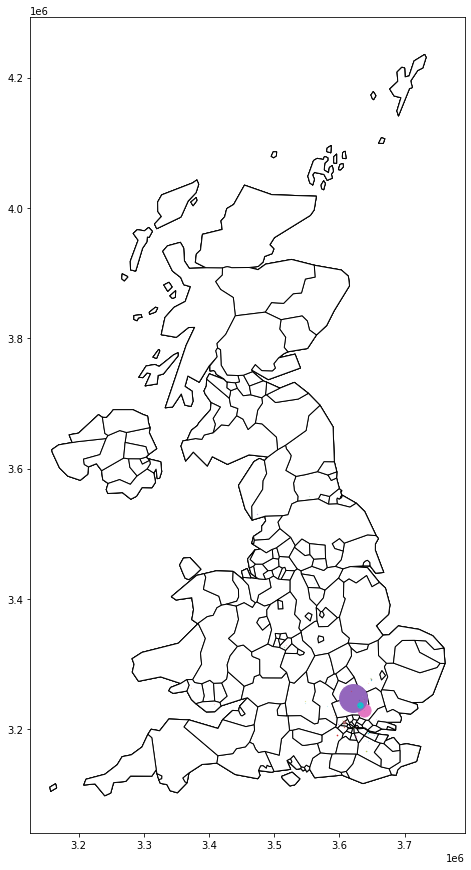

In [169]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

patent_branches['geometry'] = patent_branches.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
patent_branches_gdf = gpd.GeoDataFrame(patent_branches, geometry='geometry', crs="EPSG:4326")

patent_branches_gdf = patent_branches_gdf.to_crs(uk_gdf.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

scale = 0.08
# Plot the base map
uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Plot the branches
for x, y, size in zip(patent_branches_gdf.geometry.x, patent_branches_gdf.geometry.y, patent_branches_gdf['count']):
    ax.plot(x, y, 'o', markersize=size*scale)
post_glaxo1.plot(ax=ax, color='red', markersize=100)
post_glaxo2.plot(ax=ax, color='red', markersize=100)
ax.set_aspect('equal')
# Remove the axis
ax.axis('off')

plt.show()


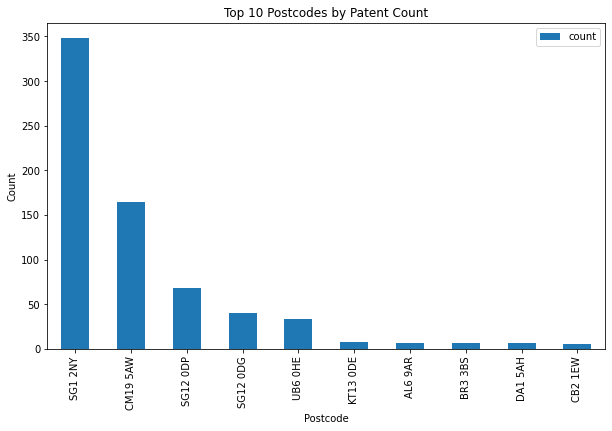

In [171]:
top_10_postcodes = patent_branches.sort_values('count', ascending=False).head(10)
top_10_postcodes.plot(kind='bar', x='postcode', y='count', figsize=(10, 6))

plt.title('Top 10 Postcodes by Patent Count')
plt.xlabel('Postcode')
plt.ylabel('Count')

plt.show()


### Network

In [287]:
G = pd.read_csv('data/Citation_Network.csv')
G.head()

,Citing_app_nbr,Cited_App_nbr
0,EP19790300237,EP19780300148
1,EP19790301143,EP19780100823
2,EP19790301145,EP19780100823
3,EP19790301144,EP19780100823
4,EP19790301142,EP19780100823


In [288]:
citation = pd.read_csv('data/Merged_UK.csv')
citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited
0,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKI23,1977
1,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKJ13,1977
2,EP19790301143,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977
3,EP19790301145,EP19780100823,A61K031/415,UKH33,1978.0,A61K,UKJ42,1977
4,EP19790301144,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977


In [289]:
# new_citation = pd.DataFrame(columns=citation.columns)

# for idx, row in citation.iterrows():
#     if row['reg_code_citing'] in mapping_dict:
#         for new_code in mapping_dict[row['reg_code_citing']]:
#             # Create a new row with the new region code and the same values
#             new_row = row.copy()
#             new_row['reg_code_citing'] = new_code
#             new_citation = new_citation.append(new_row)
#     else:
#         new_citation = new_citation.append(row)
# new_citation = new_citation.reset_index(drop=True)
# new_citation.head()

### Citing Patents Map

In [290]:
citing = citation[['Citing_app_nbr','reg_code_citing','prio_year_citing']]
citing = citing.drop_duplicates()
citing.head()

,Citing_app_nbr,reg_code_citing,prio_year_citing
0,EP19790300237,UKI23,1978.0
2,EP19790301143,UKH23,1978.0
3,EP19790301145,UKH33,1978.0
4,EP19790301144,UKH23,1978.0
5,EP19790301142,UKH33,1978.0


In [291]:
new_citing = pd.DataFrame(columns=citing.columns)

for idx, row in citing.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_citing = new_citing.append(new_row)
    else:
        new_citing = new_citing.append(row)
new_citing = new_citing.reset_index(drop=True)
new_citing.head()

,Citing_app_nbr,reg_code_citing,prio_year_citing
0,EP19790300237,UKI71,1978.0
1,EP19790300237,UKI72,1978.0
2,EP19790300237,UKI73,1978.0
3,EP19790300237,UKI74,1978.0
4,EP19790300237,UKI75,1978.0


In [292]:
new_citing.to_csv('data/Citing_New.csv', index= False)

In [293]:
# Count the number of patents for each region
patent_counts = new_citing.groupby('reg_code_citing')['Citing_app_nbr'].count()
patent_counts

reg_code_citing
GBZZZ    118
UKC11      9
UKC12      2
UKC13      2
UKC14     13
        ... 
UKN02      1
UKN03     17
UKN04      1
UKN05      2
UKN06      1
Name: Citing_app_nbr, Length: 149, dtype: int64

In [294]:
# Count the number of unique years for each region
year_counts_citing = new_citing.groupby('reg_code_citing')['prio_year_citing'].nunique().reset_index()

# Rename the columns
year_counts_citing.columns = ['reg_code_citing', 'year_count']

year_counts_citing


,reg_code_citing,year_count
0,GBZZZ,27
1,UKC11,5
2,UKC12,2
3,UKC13,1
4,UKC14,9
...,...,...
144,UKN02,1
145,UKN03,8
146,UKN04,1
147,UKN05,2


In [295]:
# Convert the series to a DataFrame
patent_counts_df = patent_counts.reset_index()

# Rename the columns
patent_counts_df.columns = ['reg_code_citing', 'Total_Patent_Count']

patent_counts_df = patent_counts_df.merge(year_counts_citing, on = 'reg_code_citing', how = 'left')
print(patent_counts_df['year_count'].isna().sum())

0


In [296]:
patent_counts_df['normalized_patent_counts'] = patent_counts_df['Total_Patent_Count'] / patent_counts_df['year_count']

citing_counts_gdf = patent_counts_df.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

citing_counts_gdf.head()

,reg_code_citing,Total_Patent_Count,year_count,normalized_patent_counts,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,118,27,4.370370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,UKC11,9,5,1.800000,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."
2,UKC12,2,2,1.000000,UKC12,3.0,UK,South Teesside,South Teesside,4.0,1.0,1.0,UKC12,"POLYGON ((3625708.122 3546887.147, 3616038.678..."
3,UKC13,2,1,2.000000,UKC13,3.0,UK,Darlington,Darlington,4.0,1.0,2.0,UKC13,"POLYGON ((3585028.631 3557236.128, 3583327.063..."
4,UKC14,13,9,1.444444,UKC14,3.0,UK,Durham CC,Durham CC,4.0,1.0,1.0,UKC14,"POLYGON ((3582515.806 3590052.703, 3587447.069..."


In [297]:
print(citing_counts_gdf['NUTS_ID'].isna().sum())

5


In [298]:
len(citing_counts_gdf)

149

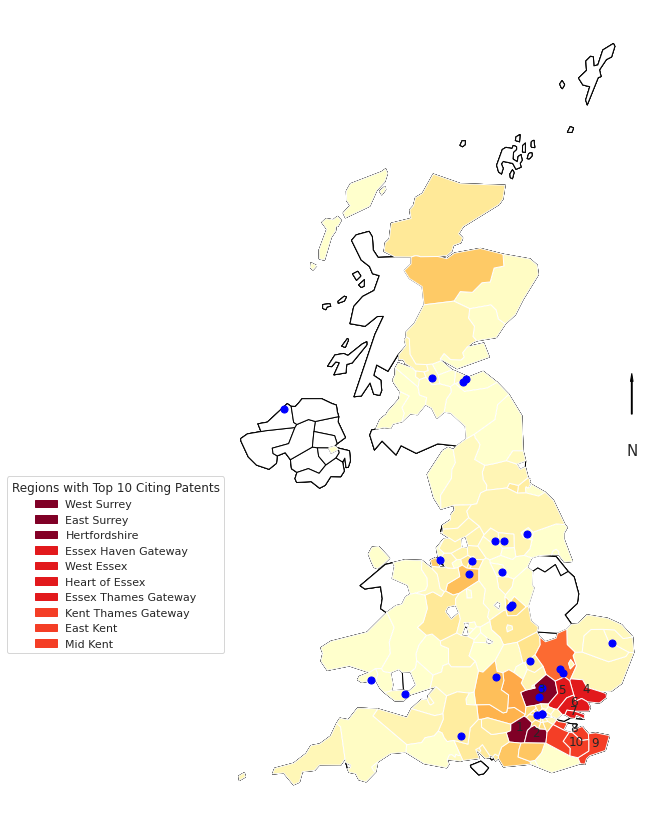

In [363]:
# Set the CRS of LQ_gdf to match the CRS of uk_gdf
citing_counts_gdf = gpd.GeoDataFrame(citing_counts_gdf, geometry='geometry')
citing_counts_gdf = citing_counts_gdf.to_crs(uk_gdf.crs)

# citing_counts_gdf['contains_incubator'] = citing_counts_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
# edgecolor = citing_counts_gdf['contains_incubator'].map({True: 'blue', False: 'white'})
# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
citing_counts_gdf.plot(ax=base, column='normalized_patent_counts', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=50)
leg = ax.get_legend()
top10 = citing_counts_gdf.nlargest(10, 'normalized_patent_counts')
top10_colors = top10['normalized_patent_counts']
cmap = plt.get_cmap('YlOrRd')
vmin = citing_counts_gdf['normalized_patent_counts'].min()
vmax = citing_counts_gdf['normalized_patent_counts'].max()
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['normalized_patent_counts'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Citing Patents')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')

plt.savefig('Citing_map.png', dpi=300, bbox_inches='tight')
plt.show()

## Most Influential Patents

In [315]:
import networkx as nx
graph = nx.from_pandas_edgelist(G, source='Citing_app_nbr', target='Cited_App_nbr', create_using=nx.DiGraph())

in_degrees = graph.in_degree()

# Find the node with the highest in-degree
most_cited_node = max(in_degrees, key=lambda x: x[1])

print(f"The most cited patent is {most_cited_node[0]} with {most_cited_node[1]} citations.")


The most cited patent is EP19870302620 with 55 citations.


In [316]:
in_degrees_dict = dict(graph.in_degree())

sorted_nodes = sorted(in_degrees_dict, key=in_degrees_dict.get, reverse=True)

N = 50 
top_nodes = sorted_nodes[:N]

# Get all nodes that are directly connected to the top nodes
connected_nodes = set()
for node in top_nodes:
    connected_nodes.update(graph.predecessors(node))

# Create a subgraph with the top nodes and their connected nodes
G_sub = graph.subgraph(list(connected_nodes))

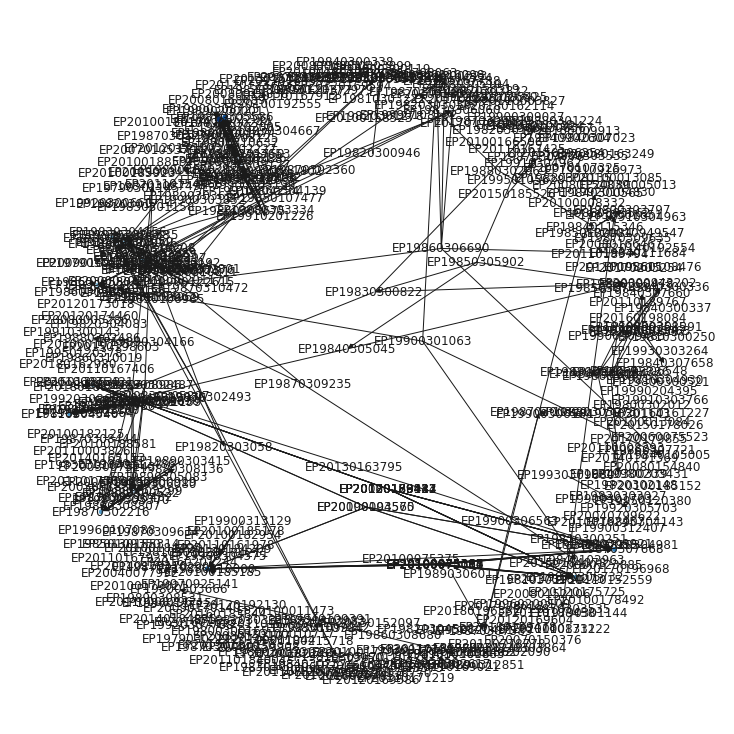

In [317]:
# # Create a color map that is proportional to the in-degrees
# colors = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create a spring layout
pos = nx.spring_layout(G_sub)

plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()

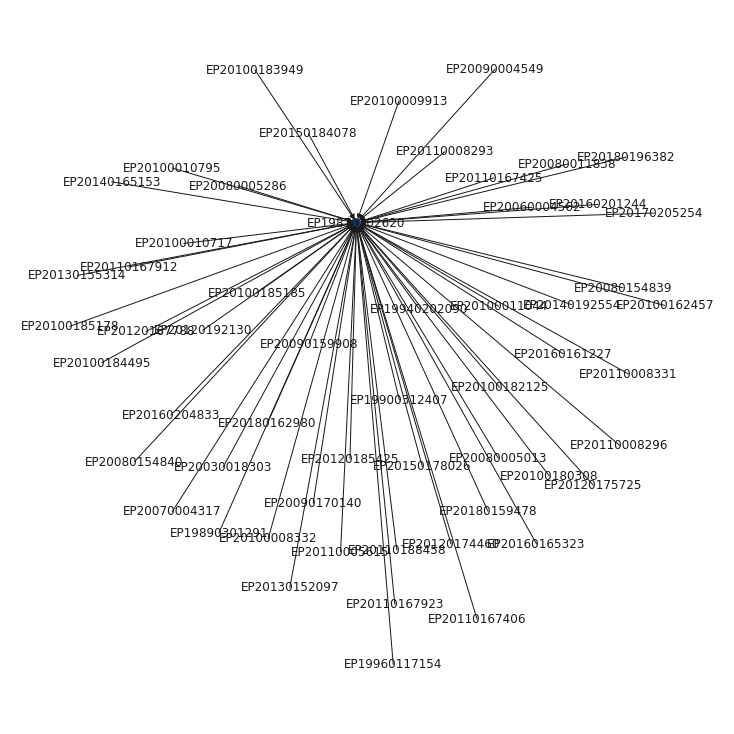

In [318]:
# Identify the node with the highest in-degree
top_node = max(in_degrees_dict, key=in_degrees_dict.get)

# Get all nodes that are directly connected to the top node
connected_nodes = list(graph.predecessors(top_node))

# Add the top node to the list of connected nodes
connected_nodes.append(top_node)

# Create a subgraph with the top node and its connected nodes
G_sub = graph.subgraph(connected_nodes)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create the plot
plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()


In [319]:
# Convert the directed graph to an undirected graph
G_undirected = graph.to_undirected()
connected_components = nx.connected_components(G_undirected)

# Get the largest connected component (GCC)
GCC = max(connected_components, key=len)

# Create a subgraph with the nodes in the GCC
G_GCC = graph.subgraph(GCC)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_GCC = [in_degrees_dict.get(n, 0) for n in G_GCC.nodes()]

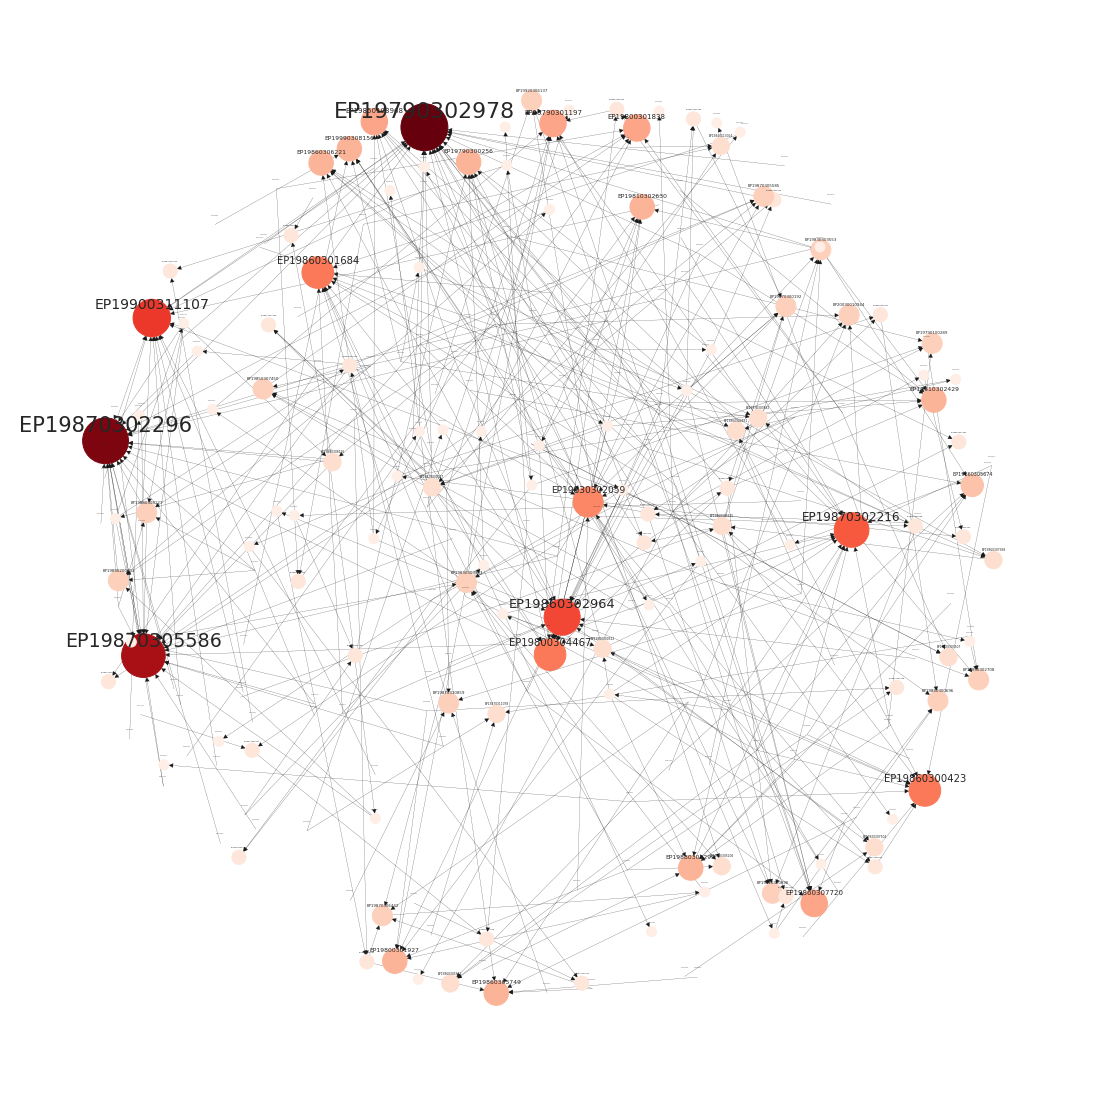

In [320]:
# Normalize the in-degrees for the color map
colors = [(in_degrees_dict.get(n, 0) - min(in_degrees_GCC)) / (max(in_degrees_GCC) - min(in_degrees_GCC)) for n in G_GCC.nodes()]

# Create a spring layout with a larger optimal distance between nodes
pos = nx.spring_layout(G_GCC, k=0.5)

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G_GCC, pos, node_size=[i * 100 for i in in_degrees_GCC], node_color=colors, with_labels=False, cmap=plt.cm.Reds, width=0.2)

# Add labels with font size proportional to in-degree
for node, (x, y) in pos.items():
    plt.text(x, y+0.02, s=node, fontsize=in_degrees_dict.get(node, 0), horizontalalignment='center')
plt.savefig('network.png', dpi=300, bbox_inches='tight')
plt.show()

In [324]:
# Convert the in-degrees to a DataFrame
in_degrees_df = pd.DataFrame(in_degrees, columns=['Cited_App_nbr', 'in_degree'])

# Merge the in-degrees DataFrame with location
merged_df = pd.merge(in_degrees_df, citation[['Cited_App_nbr', 'reg_code_Cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
# Select rows where 'in_degree' is not 0
merged_df = merged_df[merged_df['in_degree'] != 0]
merged_df = pd.merge(merged_df, citation[['Cited_App_nbr', 'prio_year_cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
print(merged_df)

      Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited
0     EP19780300148          3          UKI23             1977
1     EP19780300148          3          UKJ13             1977
2     EP19780100823          6          UKJ42             1977
3     EP19790301145          1          UKH33             1978
4     EP19790301142          1          UKH33             1978
...             ...        ...            ...              ...
2336  EP20130789610          1          UKD31             2012
2337  EP20150734640          1          UKG32             2014
2338  EP20150734640          1          UKJ13             2014
2339  EP20150734640          1          UKG13             2014
2340  EP20170717172          1          UKD71             2016

[2341 rows x 4 columns]


In [325]:
merged_df.sort_values(by='in_degree', ascending=False)

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
738,EP19870302620,55,GBZZZ,1986
1356,EP19840301996,26,UKJ33,1983
1354,EP19840301996,26,UKJ11,1983
1355,EP19840301996,26,UKJ13,1983
1365,EP19820300416,22,UKD61,1981
...,...,...,...,...
1140,EP19940302040,1,UKJ23,1993
1139,EP19940301513,1,UKE22,1993
1138,EP19930303360,1,UKD43,1992
1134,EP19900301135,1,UKD63,1989


In [327]:
new_cited = pd.DataFrame(columns=merged_df.columns)

for idx, row in merged_df.iterrows():
    if row['reg_code_Cited'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_Cited']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_Cited'] = new_code
            new_cited = new_cited.append(new_row)
    else:
        new_cited = new_cited.append(row)
new_cited = new_cited.reset_index(drop=True)
new_cited.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
0,EP19780300148,3,UKI71,1977
1,EP19780300148,3,UKI72,1977
2,EP19780300148,3,UKI73,1977
3,EP19780300148,3,UKI74,1977
4,EP19780300148,3,UKI75,1977


In [329]:
# Compute the total number of citations for each year
total_citations_per_year = new_cited.groupby('prio_year_cited')['in_degree'].sum()

# Compute the cumulative total number of citations from each year to the last year in the dataset
cumulative_citations = total_citations_per_year[::-1].cumsum()[::-1]

# Map the cumulative total number of citations to each patent
new_cited['cumulative_citations'] = new_cited['prio_year_cited'].map(cumulative_citations)

# Compute the normalized citation counts
new_cited['normalized_citations'] = new_cited['in_degree'] / new_cited['cumulative_citations']


In [330]:
new_cited.tail()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,cumulative_citations,normalized_citations
4426,EP20130789610,1,UKD35,2012,37,0.027027
4427,EP20150734640,1,UKG32,2014,5,0.2
4428,EP20150734640,1,UKJ13,2014,5,0.2
4429,EP20150734640,1,UKG13,2014,5,0.2
4430,EP20170717172,1,UKD71,2016,1,1.0


In [331]:
new_cited.to_csv('data/Cited_New.csv', index= False)

In [332]:
# Merge region_citation_counts_df and gdf
merged_gdf = new_cited.merge(gdf, left_on='reg_code_Cited', right_on='NUTS_ID', how='left')

In [333]:
print(merged_gdf['NUTS_ID'].isna().sum())

116


In [334]:
len(merged_gdf)

4431

In [33]:
# merged_gdf=merged_gdf.dropna(subset=['geometry'])
# merged_gdf = merged_gdf.sort_values(by='in_degree', ascending=False)

In [529]:
merged_gdf.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,cumulative_citations,normalized_citations,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,EP19780300148,3,UKI71,1977,8329,0.00036,UKI71,3.0,UK,Barnet,Barnet,4.0,1.0,2.0,UKI71,"POLYGON ((3621270.738 3215351.894, 3618461.047..."
1,EP19780300148,3,UKI72,1977,8329,0.00036,UKI72,3.0,UK,Brent,Brent,4.0,1.0,2.0,UKI72,"POLYGON ((3615301.727 3209998.023, 3616517.083..."
2,EP19780300148,3,UKI73,1977,8329,0.00036,UKI73,3.0,UK,Ealing,Ealing,4.0,1.0,2.0,UKI73,"POLYGON ((3612695.776 3207851.368, 3611748.222..."
3,EP19780300148,3,UKI74,1977,8329,0.00036,UKI74,3.0,UK,Harrow and Hillingdon,Harrow and Hillingdon,4.0,1.0,2.0,UKI74,"POLYGON ((3612325.172 3215508.784, 3606950.980..."
4,EP19780300148,3,UKI75,1977,8329,0.00036,UKI75,3.0,UK,Hounslow and Richmond upon Thames,Hounslow and Richmond upon Thames,4.0,1.0,1.0,UKI75,"POLYGON ((3612135.825 3202967.984, 3613362.223..."


The most cited patent does not have a valid region code. So use the detailed address:

In [336]:
merged_df.to_csv('data/In_dgree.csv', index=False)

## Most Influential Regions

In [337]:
# Group by 'reg_code_cited' and sum the in_dgree
region_citation_counts = new_cited.groupby('reg_code_Cited')['normalized_citations'].sum()

# Print the result
print(region_citation_counts)

reg_code_Cited
GBZZZ     0.07664
GY000    0.000824
IM000     0.00847
UKC11    0.001671
UKC12    0.003185
           ...   
UKN02     0.00482
UKN03    0.463839
UKN04    0.001496
UKN05    0.000184
UKN06    0.002474
Name: normalized_citations, Length: 161, dtype: object


In [338]:
# Convert the series to a DataFrame
region_citation_counts_df = region_citation_counts.reset_index()

# Rename the columns
region_citation_counts_df.columns = ['reg_code_cited', 'normalized_citation_counts']
region_citation_counts_df

,reg_code_cited,normalized_citation_counts
0,GBZZZ,0.07664
1,GY000,0.000824
2,IM000,0.00847
3,UKC11,0.001671
4,UKC12,0.003185
...,...,...
156,UKN02,0.00482
157,UKN03,0.463839
158,UKN04,0.001496
159,UKN05,0.000184


In [535]:
# # Count the number of unique years for each region
# year_counts_cited = new_cited.groupby('reg_code_Cited')['prio_year_cited'].nunique().reset_index()

# # Rename the columns
# year_counts_cited.columns = ['reg_code_cited', 'year_count']

# year_counts_cited

In [536]:
# region_citation_counts_df = region_citation_counts_df.merge(year_counts_cited, on = 'reg_code_cited', how = 'left')
# print(region_citation_counts_df['year_count'].isna().sum())

In [38]:
# region_citation_counts_df['reg_code_cited'] = region_citation_counts_df['reg_code_cited'].astype(str)
# gdf['NUTS_ID'] = gdf['NUTS_ID'].astype(str)

In [537]:
# # Convert 'Total_Citation_Count' and 'year_count' to numeric types
# region_citation_counts_df['Total_Citation_Count'] = pd.to_numeric(region_citation_counts_df['Total_Citation_Count'])
# region_citation_counts_df['year_count'] = pd.to_numeric(region_citation_counts_df['year_count'])

In [340]:
# region_citation_counts_df['normalized_citation_counts'] = region_citation_counts_df['Total_Citation_Count'] / region_citation_counts_df['year_count']

cited_counts_gdf = region_citation_counts_df.merge(gdf, left_on='reg_code_cited', right_on='NUTS_ID', how='left')

cited_counts_gdf.head()

,reg_code_cited,normalized_citation_counts,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,GBZZZ,0.07664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,GY000,0.000824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,IM000,0.00847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,UKC11,0.001671,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."
4,UKC12,0.003185,UKC12,3.0,UK,South Teesside,South Teesside,4.0,1.0,1.0,UKC12,"POLYGON ((3625708.122 3546887.147, 3616038.678..."


In [341]:
print(cited_counts_gdf['NUTS_ID'].isna().sum())

8


In [342]:
cited_counts_gdf['normalized_citation_counts'] = pd.to_numeric(cited_counts_gdf['normalized_citation_counts'])

In [343]:
top10_cited = cited_counts_gdf.nlargest(10, 'normalized_citation_counts')
print(top10_cited)


    reg_code_cited  normalized_citation_counts NUTS_ID  LEVL_CODE CNTR_CODE  \
24           UKD71                    1.005091   UKD71        3.0        UK   
157          UKN03                    0.463839     NaN        NaN       NaN   
61           UKH12                    0.370918   UKH12        3.0        UK   
98           UKJ13                    0.323840   UKJ13        3.0        UK   
67           UKH23                    0.269510   UKH23        3.0        UK   
51           UKG13                    0.220315   UKG13        3.0        UK   
56           UKG32                    0.202118   UKG32        3.0        UK   
102          UKJ25                    0.183905   UKJ25        3.0        UK   
103          UKJ26                    0.183905   UKJ26        3.0        UK   
71           UKH34                    0.151483   UKH34        3.0        UK   

               NAME_LATN            NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
24       East Merseyside      East Merseyside         4.0 

In [344]:
cited_counts_gdf = cited_counts_gdf.dropna(subset = ['NUTS_ID'])

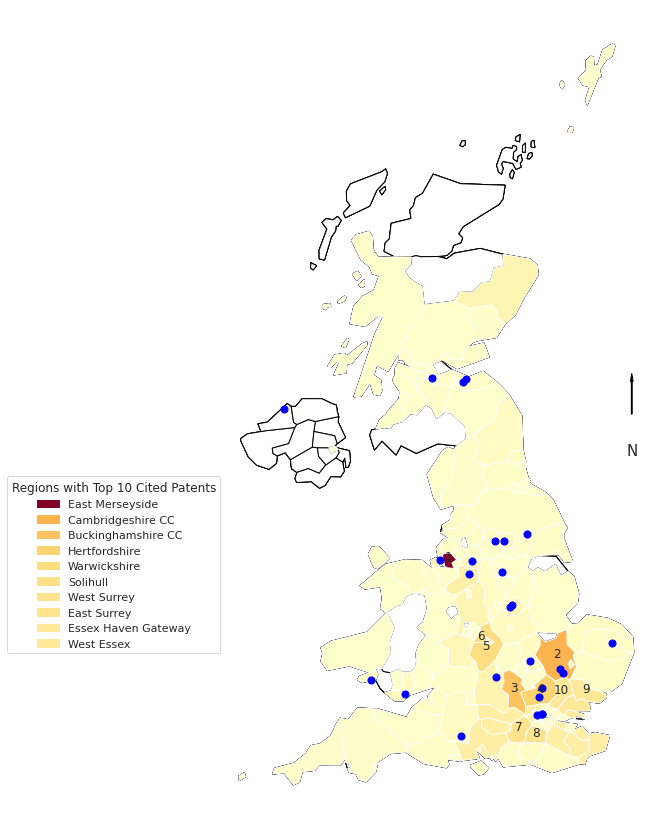

In [413]:
# Set the CRS of CITED_gdf to match the CRS of uk_gdf
cited_counts_gdf = gpd.GeoDataFrame(cited_counts_gdf, geometry='geometry')
cited_counts_gdf = cited_counts_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')
# cited_counts_gdf['contains_incubator'] = cited_counts_gdf['NUTS_ID'].isin(incubator_gdf_new['NUTS_ID'])
# edgecolor = cited_counts_gdf['contains_incubator'].map({True: 'blue', False: 'white'})
# Add regions to the base map
cited_counts_gdf.plot(ax=base, column='normalized_citation_counts', cmap='YlOrRd')
incubator_gdf.plot(ax=ax, color='blue', markersize=50)

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = cited_counts_gdf.nlargest(10, 'normalized_citation_counts')
top10_colors = top10['normalized_citation_counts']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = cited_counts_gdf['normalized_citation_counts'].min()
vmax = cited_counts_gdf['normalized_citation_counts'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend and add labels to the map
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['normalized_citation_counts'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Cited Patents')

# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')
plt.savefig('Cited_map.png', dpi=300, bbox_inches='tight')

plt.show()

## Self-citation Analysis: a patent cites another patent from the same region -- to understand the extent of local knowledge spillovers.

In [370]:
citation['is_self_citation'] = citation['reg_code_citing'] == citation['reg_code_Cited']

In [371]:
# Calculate the total number of self-citations
total_self_citations = citation['is_self_citation'].sum()

# Calculate the total number of citations
total_citations = len(citation['Cited_App_nbr'])

# Calculate the proportion of self-citations
proportion_self_citations = total_self_citations / total_citations

print(f"The total number of self-citations is {total_self_citations}.")
print(f"The total number of citations is {total_citations}.")
print(f"The proportion of self-citations is {proportion_self_citations}.")

The total number of self-citations is 1613.
The total number of citations is 6206.
The proportion of self-citations is 0.25990976474379635.


In [326]:
citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited,is_self_citation
0,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKI23,1977,True
1,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKJ13,1977,False
2,EP19790301143,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977,False
3,EP19790301145,EP19780100823,A61K031/415,UKH33,1978.0,A61K,UKJ42,1977,False
4,EP19790301144,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977,False


In [372]:
# Group by 'reg_code_citing' and sum the 'is_self_citation' column
self_citations_by_region = citation.groupby('reg_code_citing')['is_self_citation'].sum()
# Convert the Series to a DataFrame
# self_citations_by_region_df = self_citations_by_region.reset_index()
# Sort the results in descending order and take the top 5
top5_regions_self_citations = self_citations_by_region.sort_values(ascending=False).head(5)

print(top5_regions_self_citations)


reg_code_citing
UKJ23    259
UKH23    257
UKH33    179
UKJ42    127
UKD74     72
Name: is_self_citation, dtype: int64


In [373]:
len(self_citations_by_region)

115

In [374]:
# Calculate the total number of patents in each region
total_patents = citation.groupby('reg_code_citing')['Citing_app_nbr'].count()

# Normalize the self citation counts by the total number of patents in each region
normalized_self_citation_counts = self_citations_by_region / total_patents
normalized_self_citation_counts

reg_code_citing
GBZZZ    0.236000
UKC11    0.157895
UKC12    0.000000
UKC13    0.000000
UKC14    0.116279
           ...   
UKN01    0.000000
UKN02    0.000000
UKN03    0.933333
UKN04    0.000000
UKN05    0.000000
Length: 115, dtype: float64

In [375]:
norm_self_df = normalized_self_citation_counts.reset_index()
norm_self_df.columns = ['reg_code_citing','percentage of self citation']
norm_self_df.head()

,reg_code_citing,percentage of self citation
0,GBZZZ,0.236000
1,UKC11,0.157895
2,UKC12,0.000000
3,UKC13,0.000000
4,UKC14,0.116279


In [376]:
len(norm_self_df)

115

In [377]:
print(norm_self_df['percentage of self citation'].isna().sum())

0


In [378]:
new_norm_self = pd.DataFrame(columns=norm_self_df.columns)

for idx, row in norm_self_df.iterrows():
    if row['reg_code_citing'] in mapping_dict:
        for new_code in mapping_dict[row['reg_code_citing']]:
            # Create a new row with the new region code and the same values
            new_row = row.copy()
            new_row['reg_code_citing'] = new_code
            new_norm_self = new_norm_self.append(new_row)
    else:
        new_norm_self = new_norm_self.append(row)
new_norm_self = new_norm_self.reset_index(drop=True)
new_norm_self.head()

,reg_code_citing,percentage of self citation
0,GBZZZ,0.236000
1,UKC11,0.157895
2,UKC12,0.000000
3,UKC13,0.000000
4,UKC14,0.116279


In [379]:
len(new_norm_self)

149

In [380]:
new_norm_self.to_csv('data/Normed_Self_Citation.csv', index = False)

In [381]:
# Merge new_norm_self and gdf
new_norm_self_gdf = new_norm_self.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

In [382]:
print(new_norm_self_gdf['NUTS_ID'].isna().sum())

5


In [383]:
new_norm_self_gdf.sort_values(by='percentage of self citation', ascending=False)

,reg_code_citing,percentage of self citation,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
146,UKN03,0.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
25,UKE12,0.571429,UKE12,3.0,UK,East Riding of Yorkshire,East Riding of Yorkshire,4.0,1.0,1.0,UKE12,"POLYGON ((3647070.873 3450670.921, 3646740.568..."
88,UKJ12,0.500000,UKJ12,3.0,UK,Milton Keynes,Milton Keynes,4.0,1.0,3.0,UKJ12,"POLYGON ((3598326.240 3274989.145, 3591887.371..."
93,UKJ25,0.454386,UKJ25,3.0,UK,West Surrey,West Surrey,4.0,1.0,2.0,UKJ25,"POLYGON ((3596923.404 3201499.040, 3605622.913..."
94,UKJ26,0.454386,UKJ26,3.0,UK,East Surrey,East Surrey,4.0,1.0,2.0,UKJ26,"POLYGON ((3615604.252 3183666.038, 3626671.079..."
...,...,...,...,...,...,...,...,...,...,...,...,...
117,UKL13,0.000000,UKL13,3.0,UK,Conwy and Denbighshire,Conwy and Denbighshire,2.0,2.0,1.0,UKL13,"POLYGON ((3426652.782 3391984.771, 3418965.274..."
118,UKL14,0.000000,UKL14,3.0,UK,South West Wales,South West Wales,4.0,3.0,1.0,UKL14,"POLYGON ((3374887.245 3276373.205, 3365774.843..."
119,UKL17,0.000000,UKL17,3.0,UK,Bridgend and Neath Port Talbot,Bridgend and Neath Port Talbot,2.0,1.0,1.0,UKL17,"POLYGON ((3388756.995 3269942.158, 3392392.929..."
91,UKJ21,0.000000,UKJ21,3.0,UK,Brighton and Hove,Brighton and Hove,4.0,1.0,1.0,UKJ21,"POLYGON ((3615846.228 3124914.978, 3603878.979..."


In [384]:
row = gdf.loc[gdf['NUTS_ID'] == 'UKN03']

print(row.head())

Empty GeoDataFrame
Columns: [NUTS_ID, LEVL_CODE, CNTR_CODE, NAME_LATN, NUTS_NAME, MOUNT_TYPE, URBN_TYPE, COAST_TYPE, FID, geometry]
Index: []


In [385]:
new_norm_self_gdf = new_norm_self_gdf.dropna(subset=['NUTS_ID'])

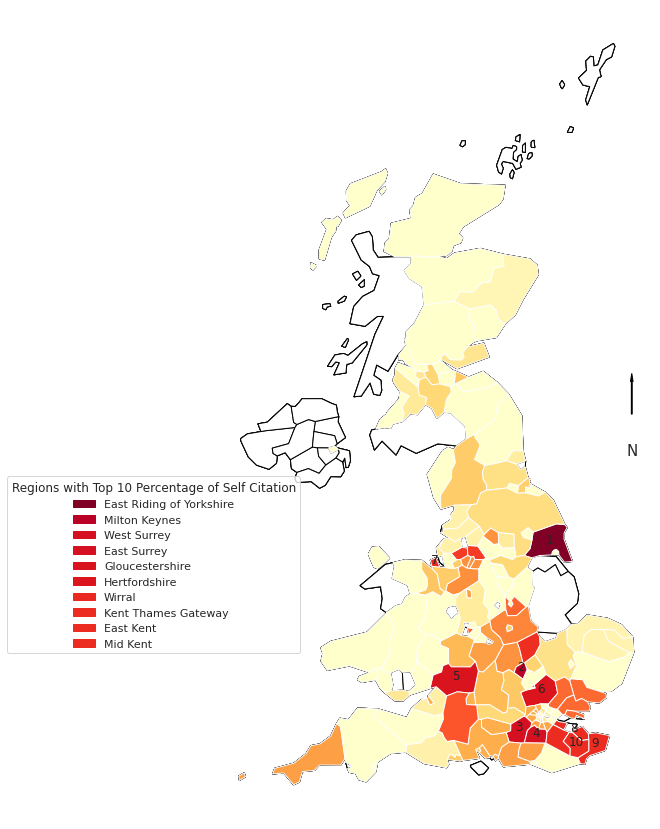

In [389]:
# Set the CRS of self_gdf to match the CRS of uk_gdf
new_norm_self_gdf = gpd.GeoDataFrame(new_norm_self_gdf, geometry='geometry')
new_norm_self_gdf = new_norm_self_gdf.to_crs(uk_gdf.crs)

# Now you can plot your data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk_gdf.plot(ax=ax, color='white', edgecolor='black')

# Add regions to the base map
new_norm_self_gdf.plot(ax=base, column='percentage of self citation', cmap='YlOrRd')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = new_norm_self_gdf.nlargest(10, 'percentage of self citation')
top10_colors = top10['percentage of self citation']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = new_norm_self_gdf['percentage of self citation'].min()
vmax = new_norm_self_gdf['percentage of self citation'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend
for i, (idx, row) in enumerate(top10.iterrows()):
    color = cmap((row['percentage of self citation'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)
    
    # Add labels to the map
    ax.annotate(text=str(i+1), xy=row['geometry'].centroid.coords[0], ha='center')

# Create the legend
ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Percentage of Self Citation')
# Add a north arrow
arrow = mpatches.Arrow(0.95, 0.5, 0, 0.05, width=0.01, transform=ax.transAxes, color='black')
ax.add_patch(arrow)
ax.text(0.95, 0.45, 'N', transform=ax.transAxes, ha='center', fontsize=15)

# Remove grid and axes
ax.grid(False)
ax.axis('off')
plt.savefig('Self_map.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [56]:
# df_da = df_da.set_index(['reg_code', 'prio_year'])
# y = df_da['app_nbr']
# X = sm.add_constant(df_da.index.get_level_values('prio_year'))
# model = PanelOLS(y, X, entity_effects=True)
# results = model.fit()
# print(results)

### How diversity might influence the number of citations a patent receives: Shannon's entropy

In [545]:
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
0,EP19780300148,3,UKI23,1977
1,EP19780300148,3,UKJ13,1977
2,EP19780100823,6,UKJ42,1977
3,EP19790301145,1,UKH33,1978
4,EP19790301142,1,UKH33,1978


In [112]:
df.head()

,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12


In [128]:
df_sh = df[df['app_nbr'].isin(merged_df['Cited_App_nbr'])]

In [120]:
import numpy as np

In [129]:
grouped_ipc = df_sh.groupby('app_nbr')['IPC'].apply(list)

def shannon_entropy(ipc_list):
    frequencies = pd.Series(ipc_list).value_counts(normalize=True)
    return -np.sum(frequencies * np.log(frequencies))

entropy_values = grouped_ipc.apply(shannon_entropy)

entropy_df = entropy_values.reset_index()
entropy_df.columns = ['app_nbr', 'Shannon_Entropy']

df_sh = pd.merge(df_sh, entropy_df, on='app_nbr', how='left')

df_sh.head()


,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC,Shannon_Entropy
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21,1.098612
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555,1.098612
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00,1.098612
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00,2.079442
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12,2.079442


In [137]:
print(entropy_df['Shannon_Entropy'].isna().sum())

0


In [130]:
merged_df = pd.merge(merged_df, entropy_df, left_on='Cited_App_nbr', right_on='app_nbr', how='left')

In [131]:
merged_df = merged_df.drop(['app_nbr'], axis=1)
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,UKI23,1977,2.302585
1,EP19780300148,3,UKJ13,1977,2.302585
2,EP19780100823,6,UKJ42,1977,2.995732
3,EP19790301145,1,UKH33,1978,2.079442
4,EP19790301142,1,UKH33,1978,1.945910


In [132]:
counts_entropy = merged_df.drop(['reg_code_Cited'], axis = 1)
counts_entropy = counts_entropy.drop_duplicates()
counts_entropy.head()

,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
2,EP19780100823,6,1977,2.995732
3,EP19790301145,1,1978,2.079442
4,EP19790301142,1,1978,1.945910
5,EP19790301557,1,1978,1.386294


In [ ]:
# Some patents in merged_df is not in df_sh
print(counts_entropy['Shannon_Entropy'].isna().sum())

595


In [154]:
# Extract rows where 'Shannon_Entropy' is null
null_entropy = counts_entropy[counts_entropy['Shannon_Entropy'].isnull()]
exists = null_entropy['Cited_App_nbr'].isin(citation['Cited_App_nbr'])
print(exists.value_counts())


True    595
Name: Cited_App_nbr, dtype: int64


In [158]:
cite_entro = citation[citation['Cited_App_nbr'].isin(null_entropy['Cited_App_nbr'])]
cite_entro = cite_entro[['Cited_App_nbr','IPC_Cited']]
cite_entro = cite_entro.drop_duplicates()
cite_entro.head()

,Cited_App_nbr,IPC_Cited
209,EP19810303256,C07J041/00
317,EP19800303328,G01N033/53
339,EP19810109184,B01J027/125
486,EP19820301322,C07H019/06
522,EP19810305206,C07C 213/00


In [159]:
len(cite_entro)

595

In [160]:
grouped_ipc_citation = cite_entro.groupby('Cited_App_nbr')['IPC_Cited'].apply(list)

entropy_values_citation = grouped_ipc_citation.apply(shannon_entropy)

entropy_df_citation = entropy_values_citation.reset_index()
entropy_df_citation.columns = ['Cited_App_nbr', 'Shannon_Entropy']
entropy_df_citation.head()

,Cited_App_nbr,Shannon_Entropy
0,EP19790901156,-0.0
1,EP19800303143,-0.0
2,EP19800303328,-0.0
3,EP19800303457,-0.0
4,EP19800303992,-0.0


In [161]:
counts_entropy.set_index('Cited_App_nbr', inplace=True)
entropy_df_citation.set_index('Cited_App_nbr', inplace=True)
counts_entropy['Shannon_Entropy'].update(entropy_df_citation['Shannon_Entropy'])

counts_entropy.reset_index(inplace=True)
entropy_df_citation.reset_index(inplace=True)

In [546]:
counts_entropy.head()

,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
1,EP19780100823,6,1977,2.995732
2,EP19790301145,1,1978,2.079442
3,EP19790301142,1,1978,1.945910
4,EP19790301557,1,1978,1.386294


In [162]:
print(counts_entropy['Shannon_Entropy'].isna().sum())

0


In [547]:
# Compute the total number of citations for each year
total_citations_per_year = counts_entropy.groupby('prio_year_cited')['in_degree'].sum()

# Compute the cumulative total number of citations from each year to the last year in the dataset
cumulative_citations = total_citations_per_year[::-1].cumsum()[::-1]

# Map the cumulative total number of citations to each patent
counts_entropy['cumulative_citations'] = counts_entropy['prio_year_cited'].map(cumulative_citations)

# Compute the normalized citation counts
counts_entropy['normalized_citations'] = counts_entropy['in_degree'] / counts_entropy['cumulative_citations']
counts_entropy.head()


,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy,cumulative_citations,normalized_citations
0,EP19780300148,3,1977,2.302585,3036,0.000988
1,EP19780100823,6,1977,2.995732,3036,0.001976
2,EP19790301145,1,1978,2.079442,2983,0.000335
3,EP19790301142,1,1978,1.945910,2983,0.000335
4,EP19790301557,1,1978,1.386294,2983,0.000335


In [548]:
counts_entropy.to_csv('Counts_Entropy.csv', index=False)

In [164]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['in_degree']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.61
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.37e-21
Time:                        17:28:30   Log-Likelihood:                -3840.5
No. Observations:                1703   AIC:                             7685.
Df Residuals:                    1701   BIC:                             7696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2278      0.080     

In [549]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['normalized_citations']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_citations   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     9.417
Date:                  Mon, 17 Jul 2023   Prob (F-statistic):            0.00218
Time:                          02:59:25   Log-Likelihood:                 3667.4
No. Observations:                  1703   AIC:                            -7331.
Df Residuals:                      1701   BIC:                            -7320.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

# statistically significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. 

1. The coefficient for Shannon Entropy is 0.4979: for each unit increase in Shannon Entropy, the number of citations a patent receives increases by about 0.498. This result is statistically significant, as the p-value is less than 0.05.

2. The R-squared value is 0.052: only about 5.2% of the variation in the number of citations a patent receives can be explained by its Shannon Entropy. While there is a significant relationship, there are likely other factors not included in this model that also have an impact on the number of citations a patent receives.

3. The residuals: not normally distributed --- the Omnibus test p-value is close to 0, and there is a high degree of skewness and kurtosis. Potentially violate the assumptions of the OLS regression model and may impact the reliability of the results. 

4. The results suggest that the diversity of IPC codes in a patent does have a significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. Identify more other factors that could explain more of this variation.

# Other factors:

1. **Research and Development (R&D) Expenditure**: The amount of money invested in R&D can significantly influence the number of patents: OECD.

2. **Government Policies and Regulations**

3. **Economic Factors**: GDP growth: World Bank, OECD.

4. **Scientific Progress and Technological Change**: The number of scientific publications in related fields.

5. **Education and Human Capital**: The number of graduates in relevant fields, the number of researchers working in the pharmaceutical industry.